<center> <h1>COSC 522 Machine Learning Homework 2</h1> </center>

<br>
<br>
<center> <h3> Yangsong Gu </h3></center>
<center> <h3> Sep 15, 2021 <h3></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sympy import lambdify
from sympy import Symbol, symbols, simplify
import sympy

from matplotlib import cm

In [2]:
X = [0.8, 0.9, 1.2, 1.1, 0.8, 0.6, 0.65, 0.75]
Y = [1.2, 1.4, 1.4, 1.5, 1.1, 1, 1.1, 0.9]
Class = [1, 1, 1, 1, 2, 2, 2, 2]

print(len(X),len(Y), len(X)==len(Y)== len(Class))

8 8 True


In [3]:
df_train = pd.DataFrame(zip(X,Y,Class), columns = ['X', 'Y', 'Class'])
df_train

,X,Y,Class
0,0.80,1.2,1
1,0.90,1.4,1
2,1.20,1.4,1
3,1.10,1.5,1
4,0.80,1.1,2
5,0.60,1.0,2
6,0.65,1.1,2
7,0.75,0.9,2


### Question 1 Mahalanobis distance vs. Euclidean distance.

- a. Manually calculate the mean and covariance of the two classes of training
samples. You can use calculator for intermediate calculations. However, you need
to show details.

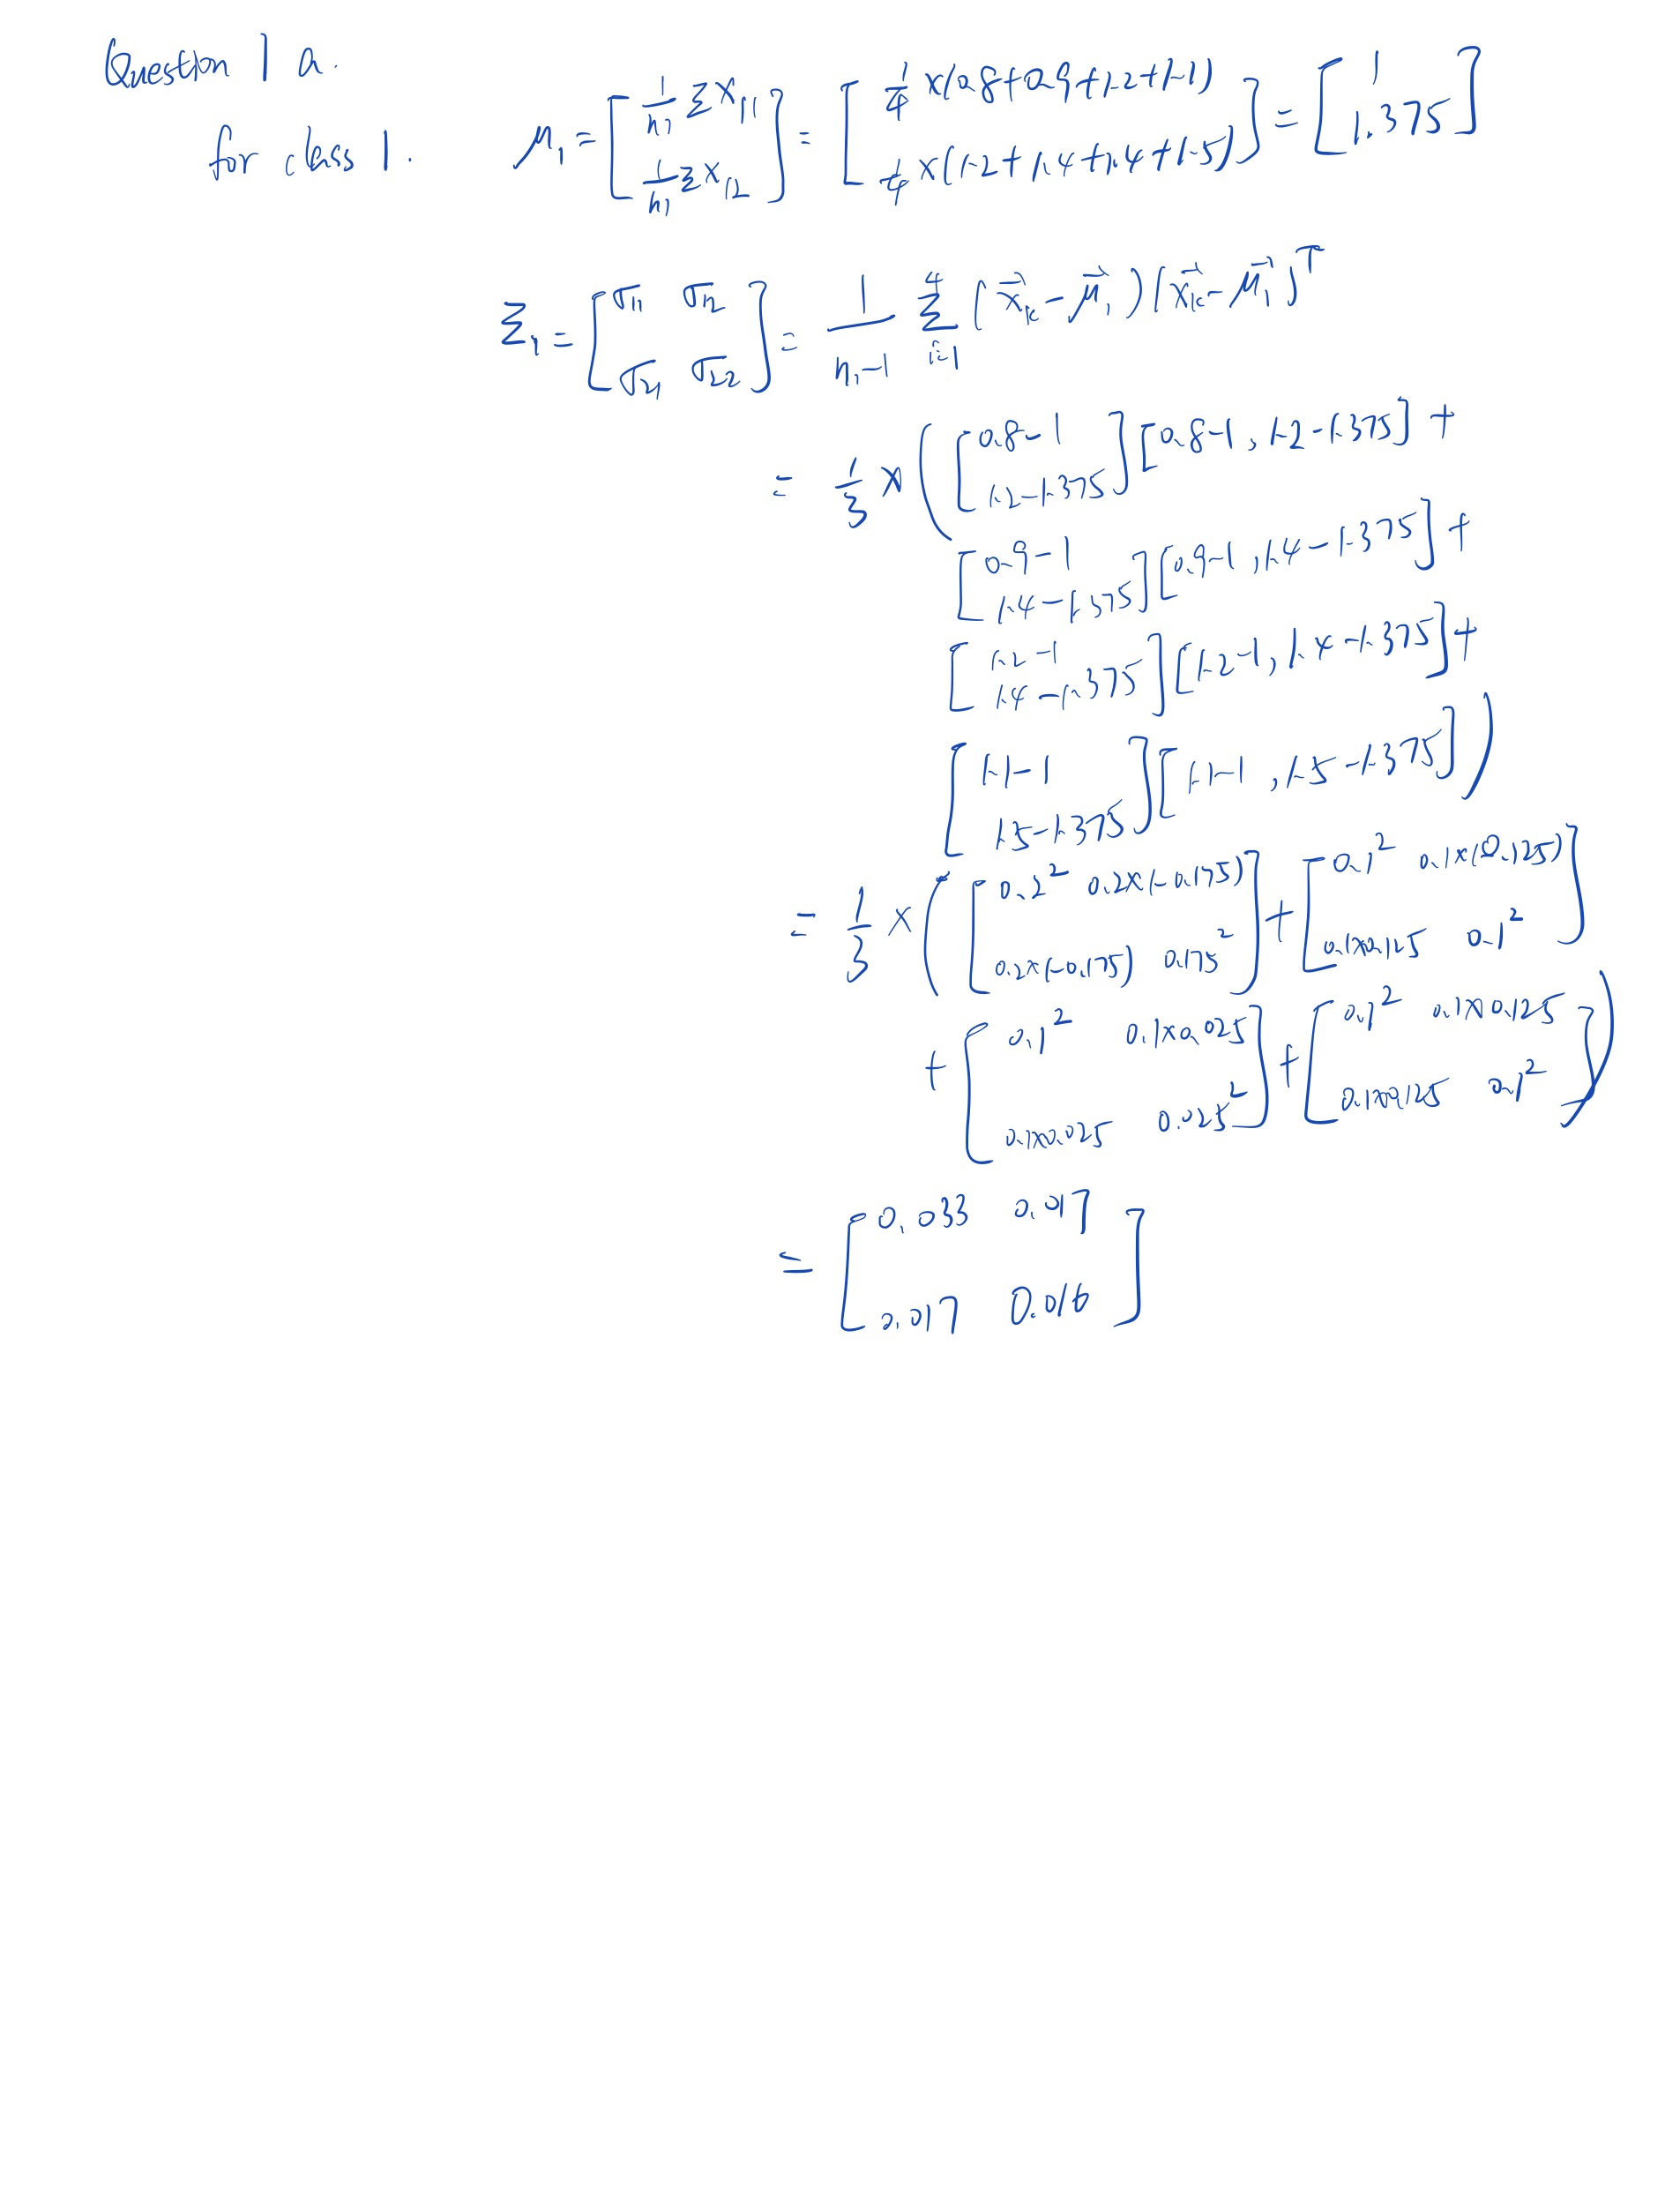

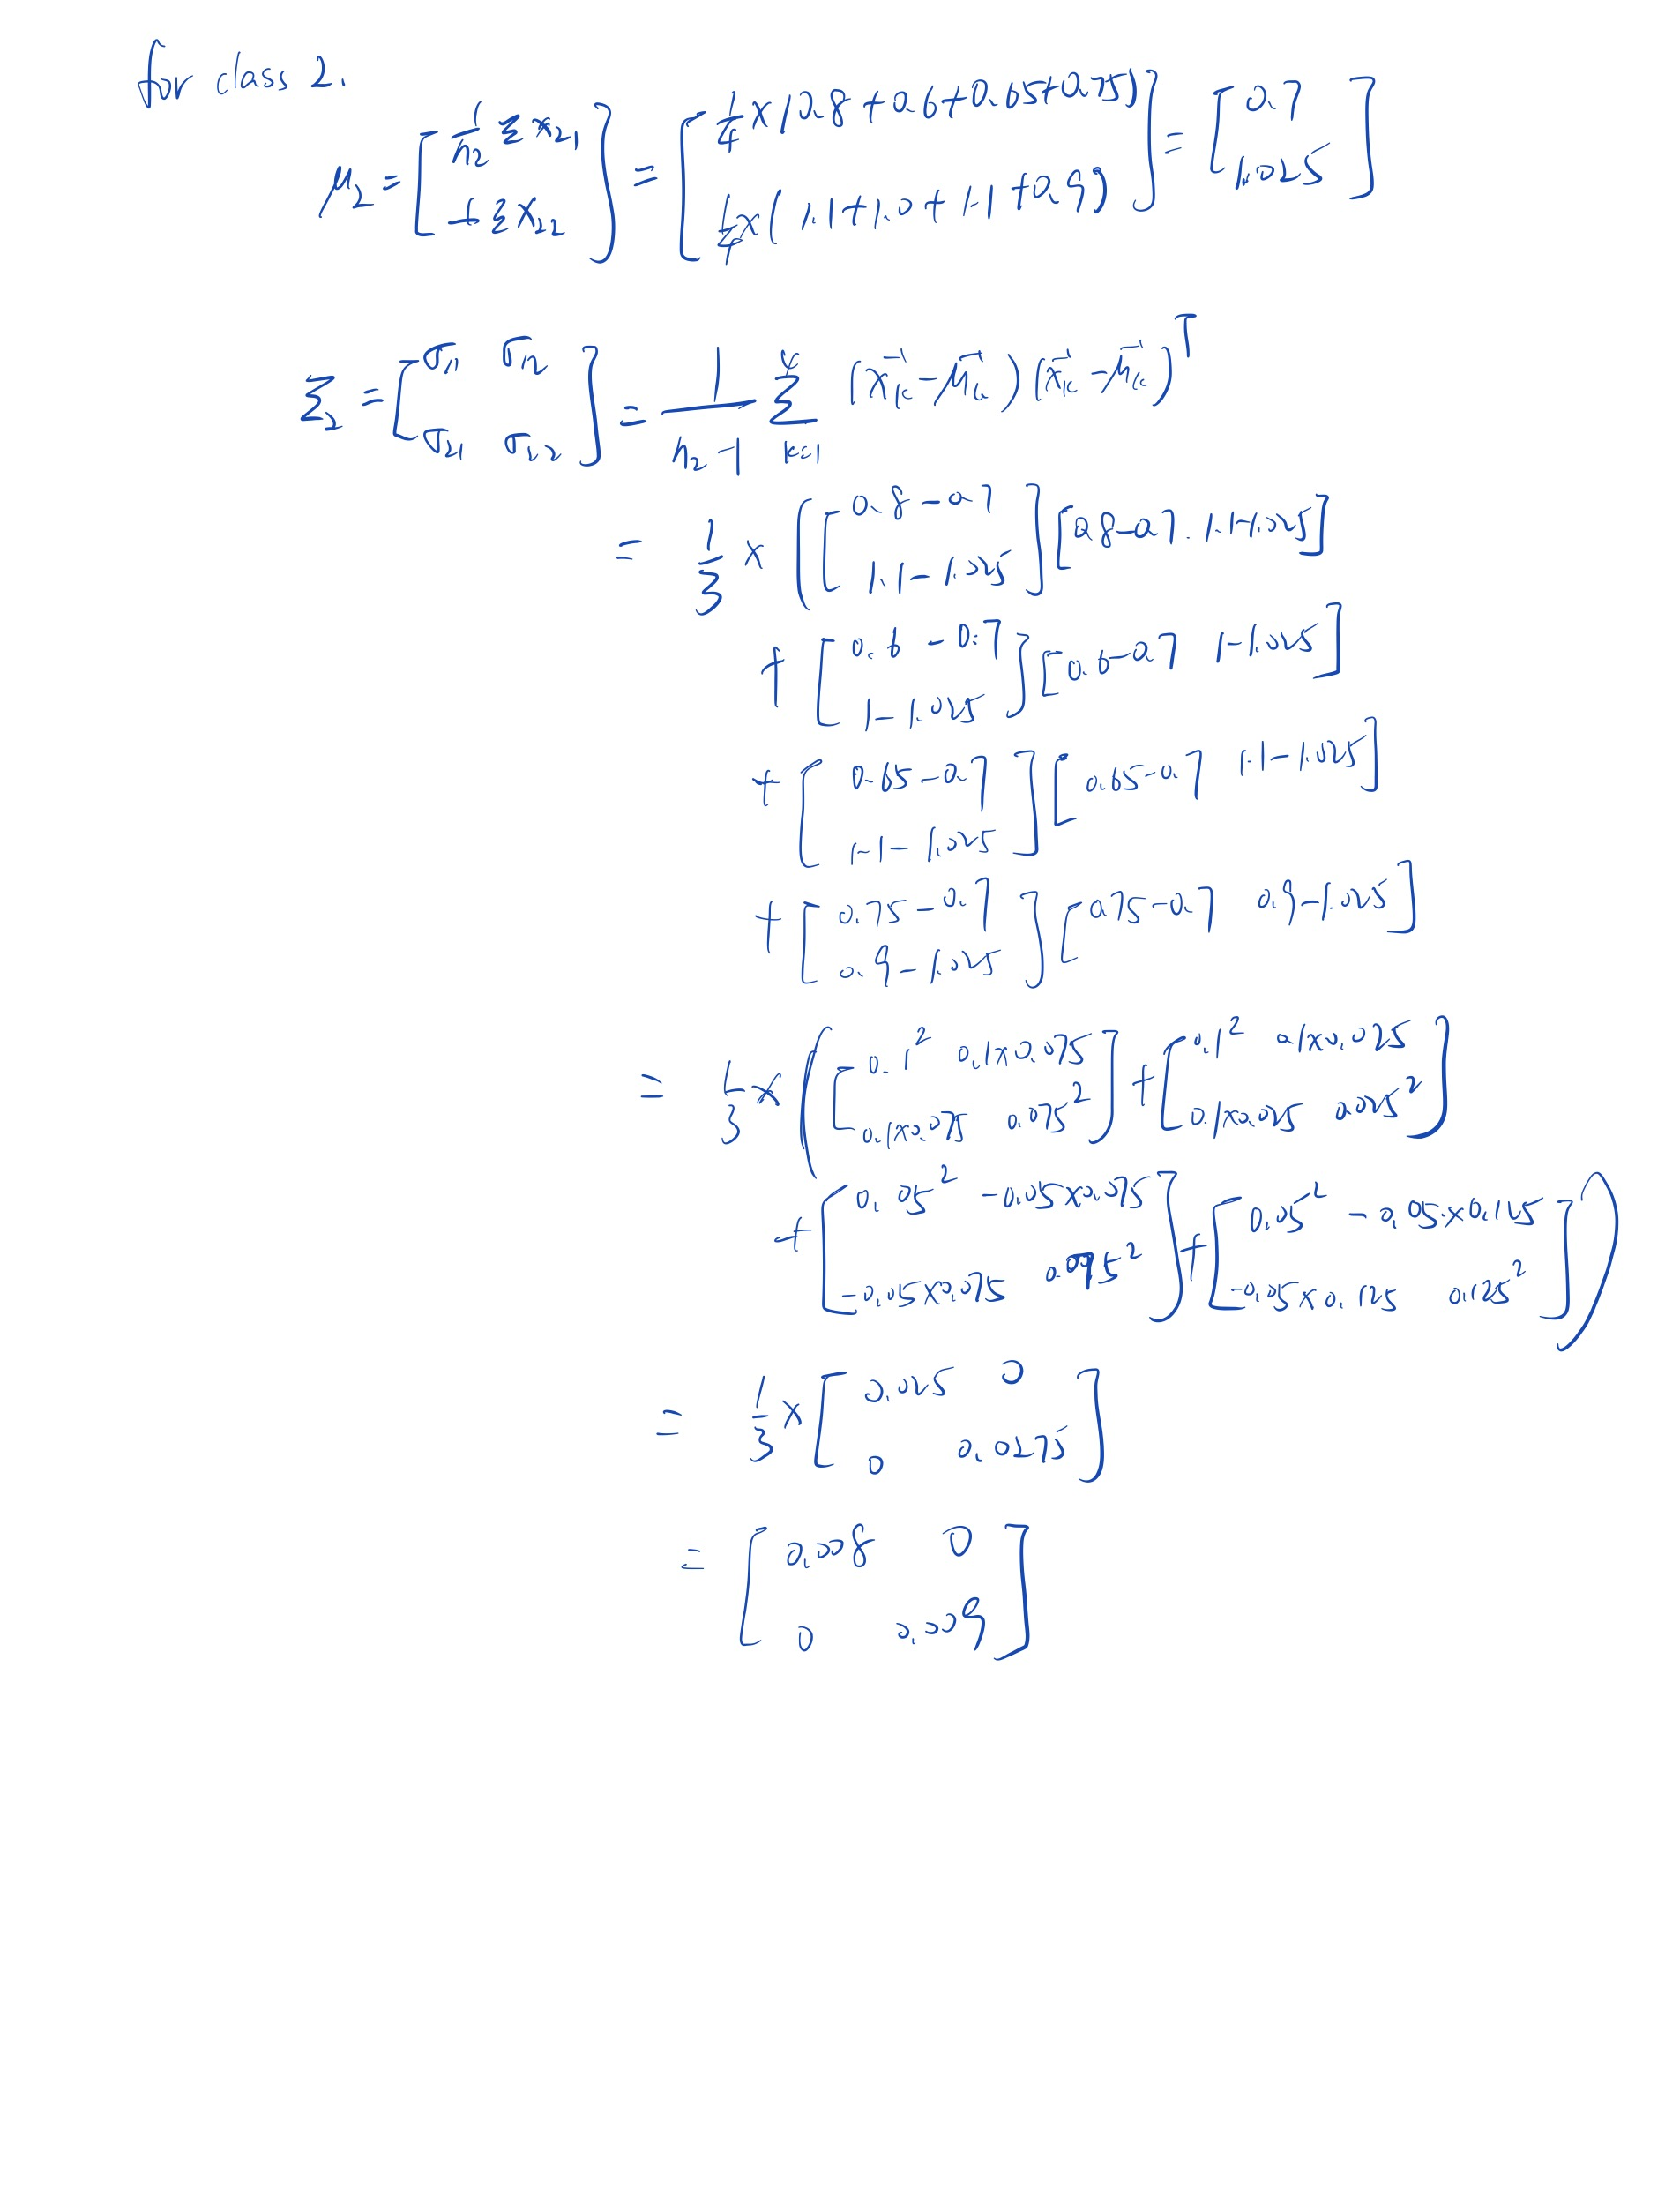

- b. Assuming Gaussian distribution, based on the means and covariance matrix,
plot the contour maps of the two multi-variate Gaussian distributions for the two
classes in Python, overlay the contour on the scatter plot of the data samples. Also
plot a test sample x = [0.85 1.15]T on the same figure with different color. Which
class do you think x should belong to (based only on visual inspection)?

In [4]:
sigma1 = np.matrix([[0.033,0.017], [0.017,0.016]])
sigma2 = np.matrix([[0.008,0],[0,0.009]])

mu1  = np.matrix([[1], [1.375]])
mu2  = np.matrix([[0.7], [1.025]])

# sigma2 = np
# two variates Gaussian model 

def multi_gaussian(sigma, mu):
    
    '''
    generate multi-gaussian p.d.f function
    '''
    x, y = symbols('x y')     # two features
    X = sympy.Matrix([x,y]) # feature vector
    
    multi_gaussian_distr = 1/(2 * (np.pi) * (np.sqrt(np.linalg.det(sigma)))) * sympy.exp(-0.5*(X - mu).transpose() @ np.linalg.inv(sigma) @ (X-mu))
   
    var = (x, y)                # input is feature x and y 
    
    multi_gaussian_distr_func = lambdify(var, multi_gaussian_distr, modules = 'numpy')

    return multi_gaussian_distr_func

multi_gauss_class1 = multi_gaussian(sigma1, mu1)
multi_gauss_class2 = multi_gaussian(sigma2, mu2)

# generate a series of points
num_points = 500
x_plot = np.linspace(-2,2,num_points)
y_plot = np.linspace(-2,2,num_points)
xx, yy = np.meshgrid(x_plot, y_plot)


Text(1, 1, 'Class 2')

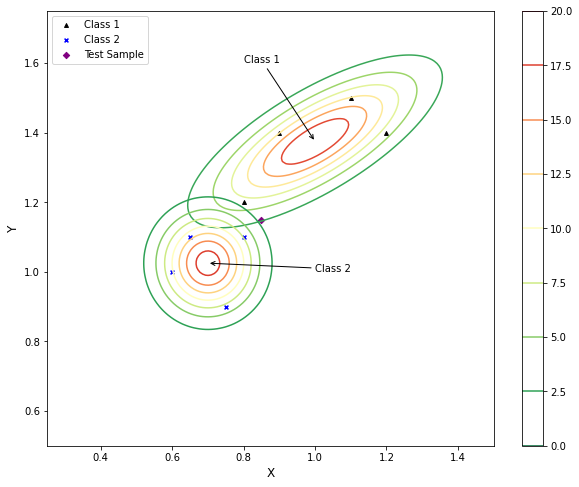

In [5]:
class1 = df_train.query('Class == 1').reset_index(drop=True)  # class 1 dataset
class2 = df_train.query('Class == 2').reset_index(drop=True)

fig, ax = plt.subplots(figsize = (10,8))
zz1 = multi_gauss_class1(xx,yy).reshape(num_points,num_points)
zz2 = multi_gauss_class2(xx,yy).reshape(num_points,num_points)

cs = ax.contour(xx, yy, zz1,cmap = "RdYlGn_r")
cs = ax.contour(xx, yy, zz2,cmap = "RdYlGn_r")

# fig.colorbar(cs, ax=ax, shrink=0.9)
plt.colorbar(cs)

ax.scatter(class1.X, class1.Y,  s = 15, c = 'k' , marker = '^', label = 'Class 1')
ax.scatter(class2.X, class2.Y,  s = 15, c = 'blue' ,marker = 'x', label = 'Class 2')

ax.scatter(0.85, 1.15, s = 20, c = 'purple',marker = 'D', label = 'Test Sample')
ax.set_ylim([0.5,1.75])
ax.set_xlim([0.25,1.5])
ax.set_xlabel('X', fontsize = 12)
ax.set_ylabel('Y', fontsize = 12)
ax.legend(loc = 'upper left')

ax.annotate("Class 1",
            xytext=(0.8, 1.6), xycoords='data',
            xy=(mu1[0], mu1[1]), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("Class 2",
            xytext=(1, 1), xycoords='data',
            xy=(mu2[0], mu2[1]), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

According to the above contour chart, the test sample X = (0.85, 1.15)^T, as the diamond marker shows, is closer to the center of Class 1 than Class 2. Hence, the test sample should be classified into Class 1 from visual inspection. 

- c. Write the equations to calculate these two distances between the testing
sample and the cluster. (Note: ONLY the equation. Also Note: this is distance not
squared distance)

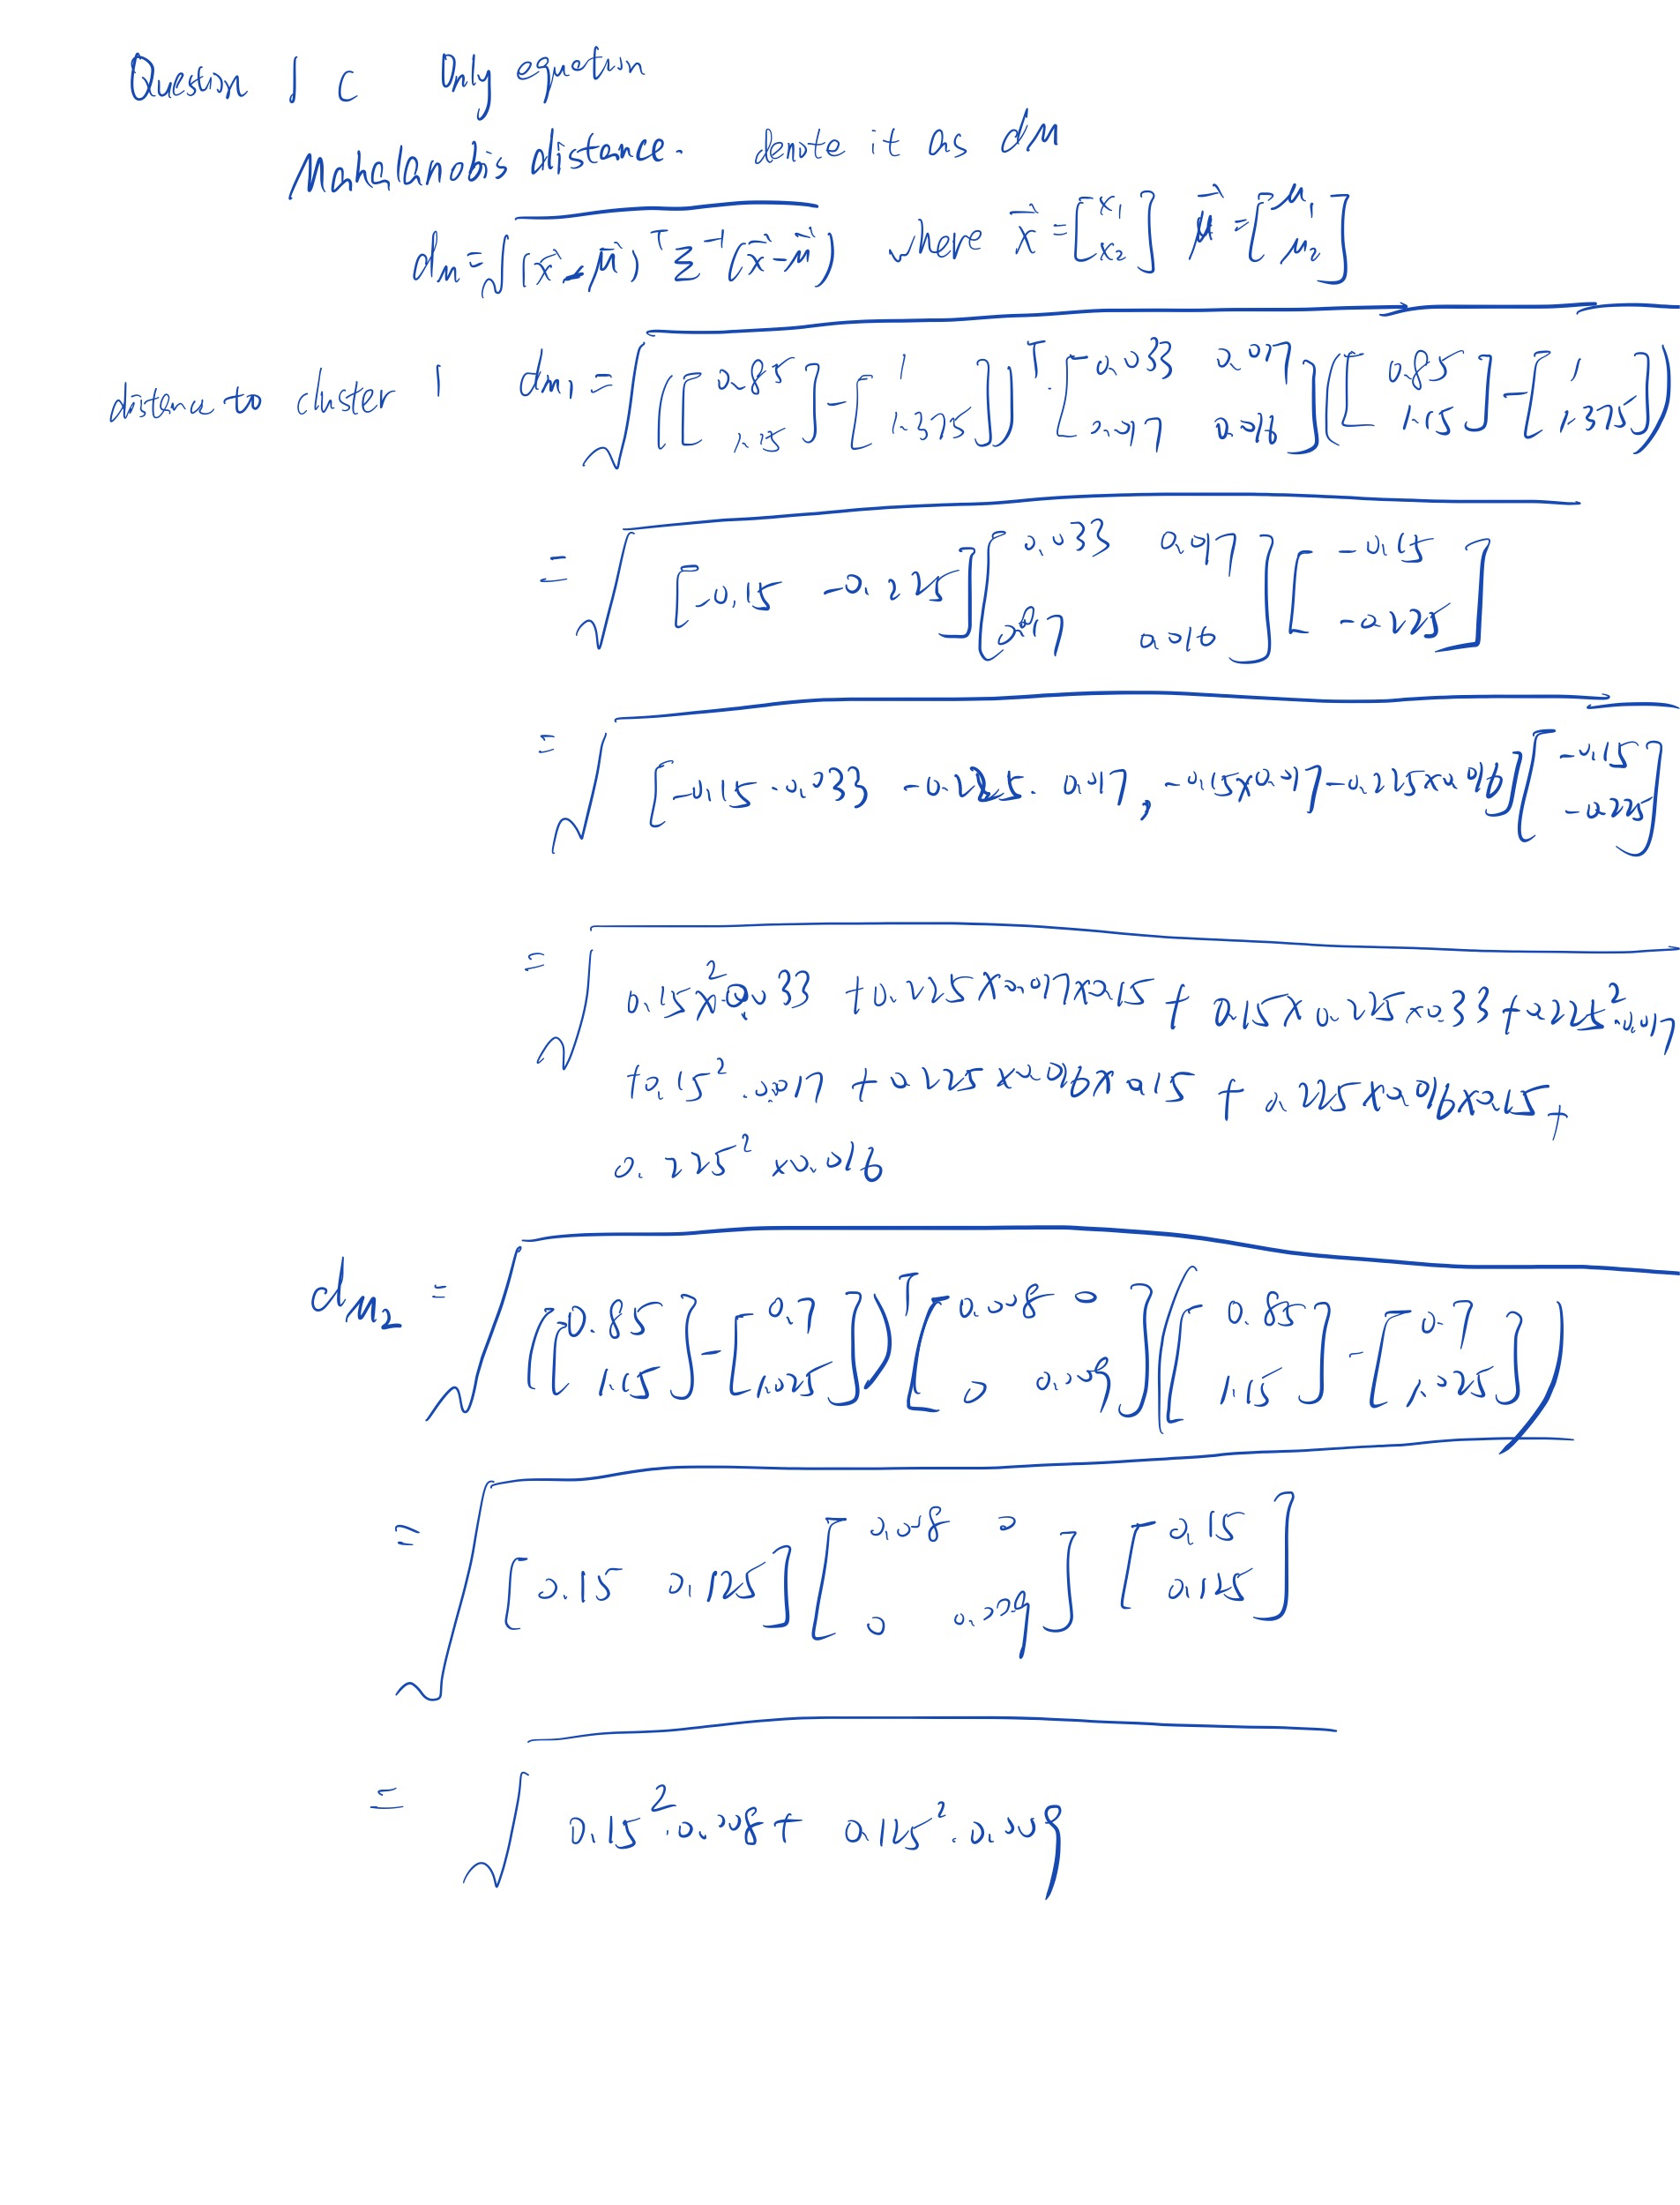

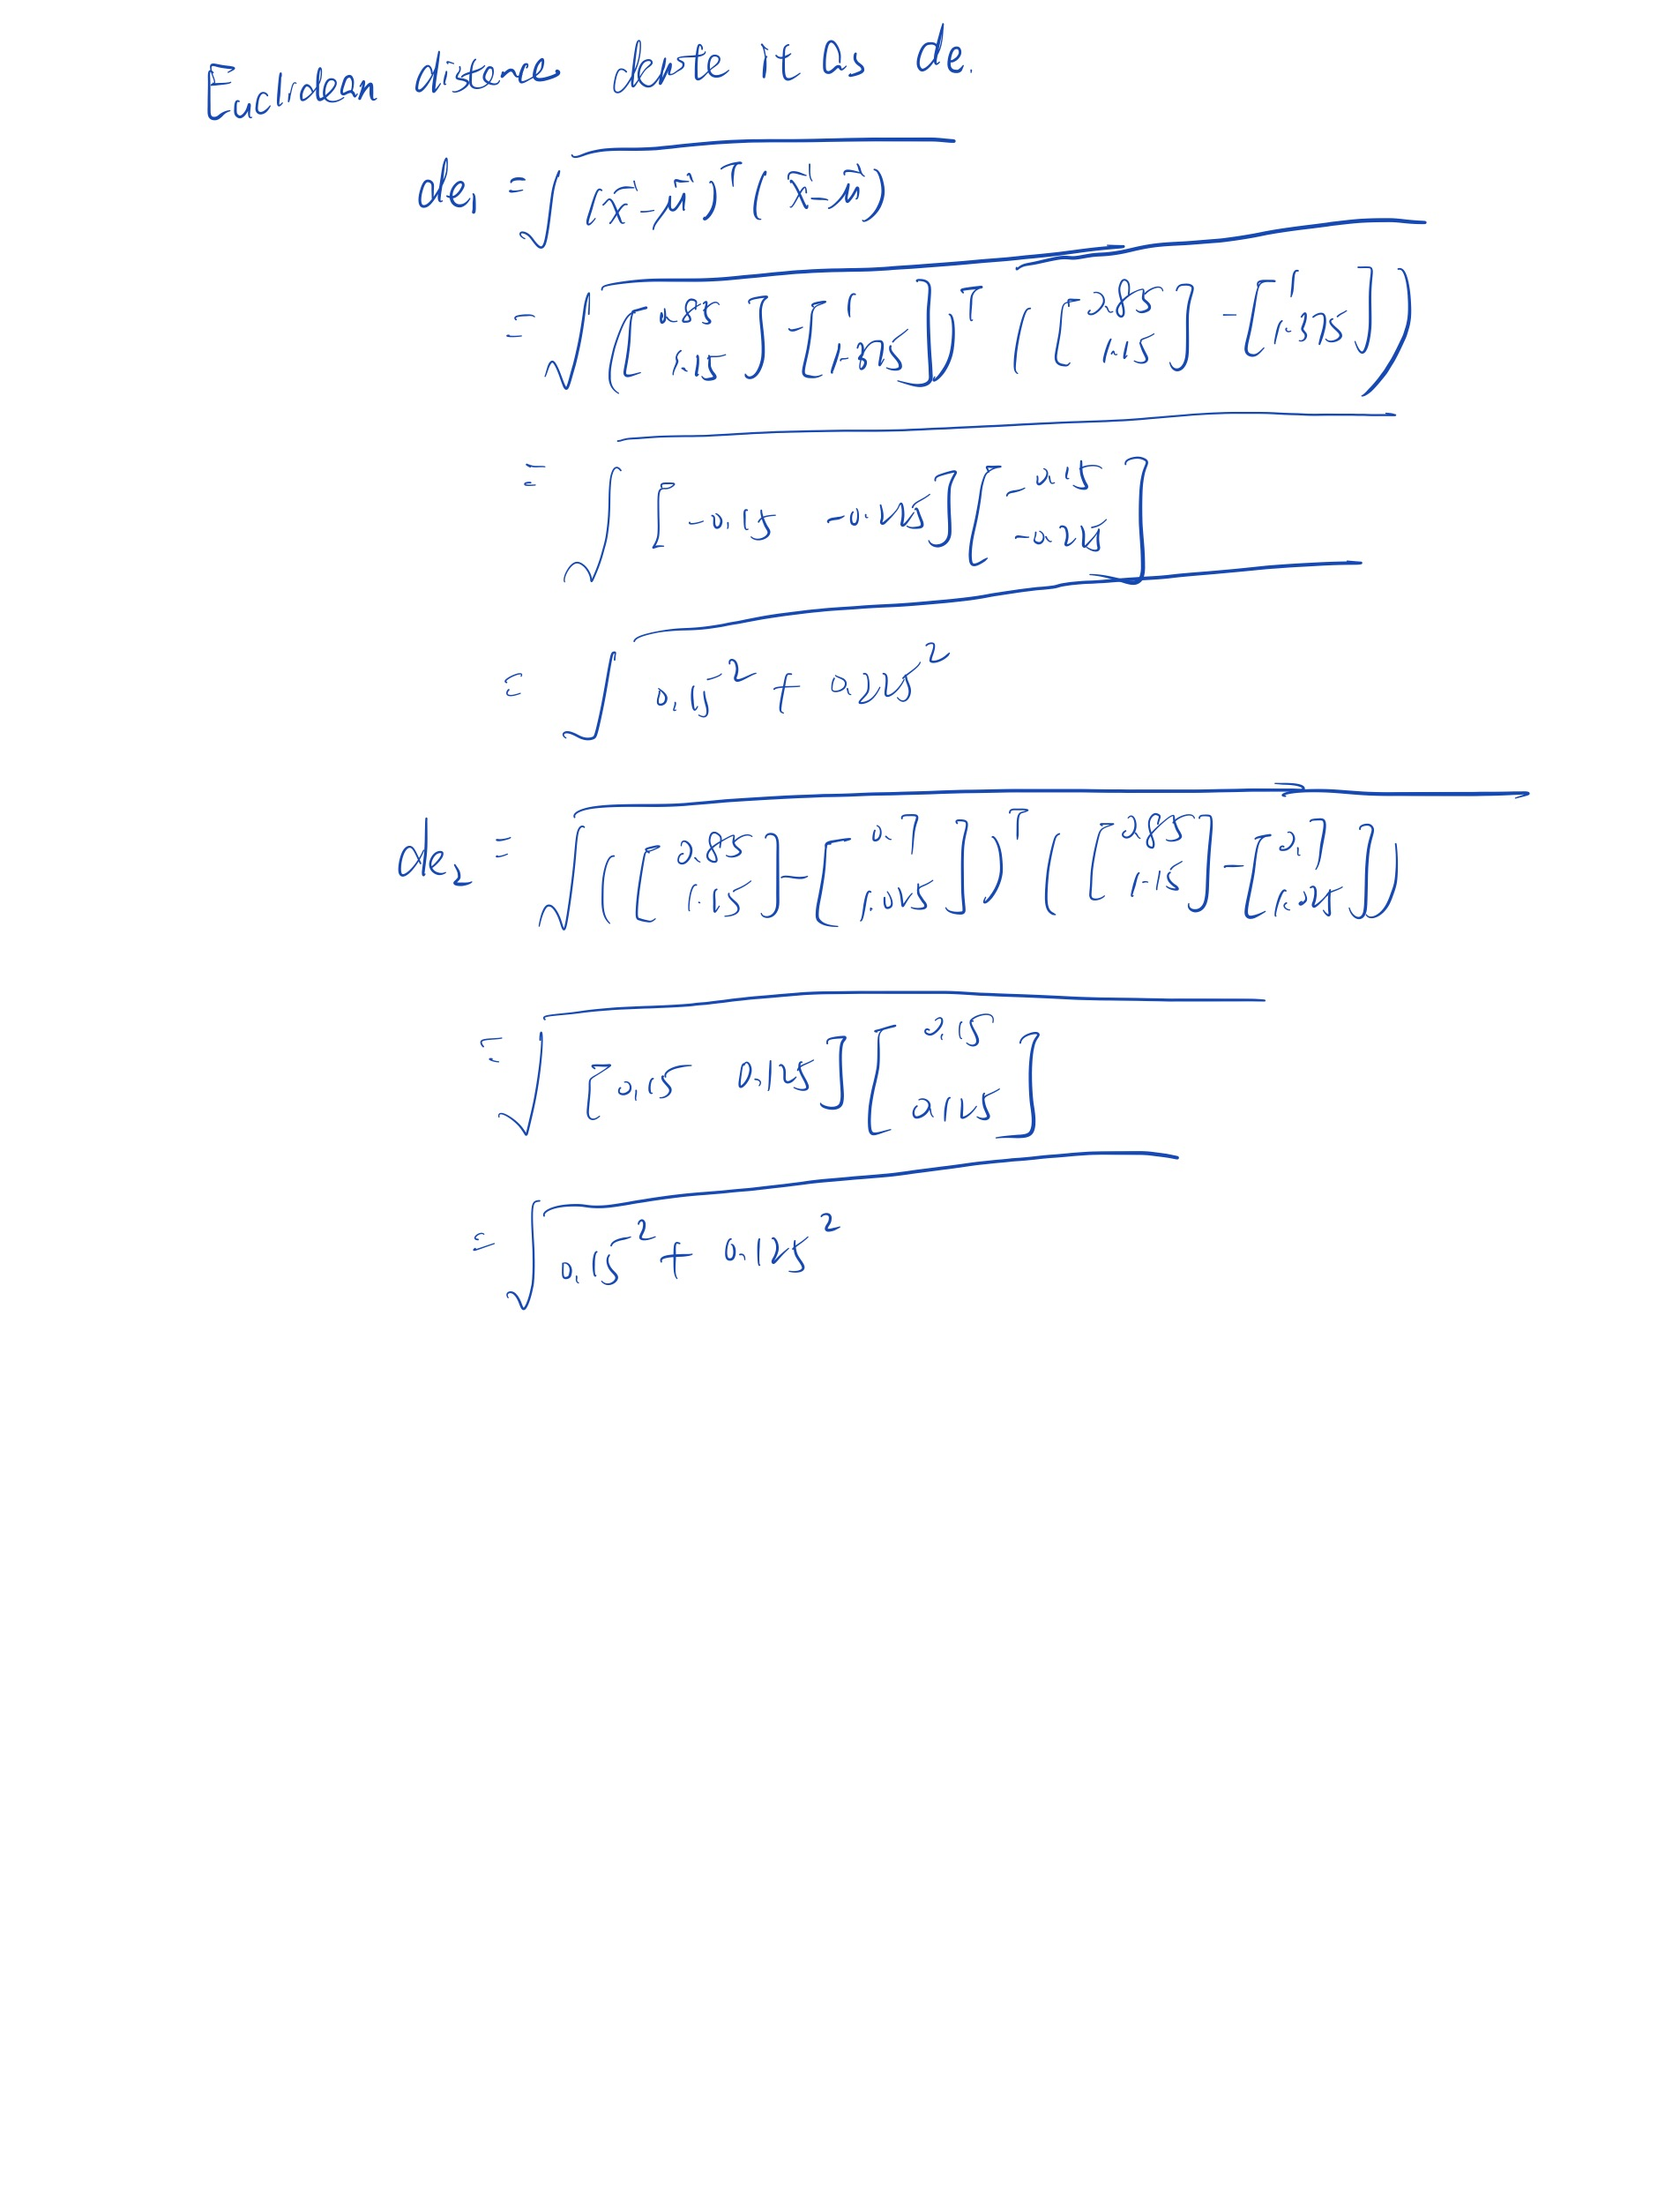

- d. Explain intuitively (in no more than three sentences) the differences between
the two distances.

The Euclidean distance measures the straight line distance on a (hyper)plane since it does not consider the covariance of features. While, the Mahalanobis distance measures the distance in a spherical manner since the covariance is considered, the distance would not be a straight line between two points.

- e. Use the following example to understand the differences these two distances
make in classification. Here, the minimum distance classifier (i.e., Case 1) is used.

In [6]:
def euclidean_dist(center, sample):
    
    '''   
    calculate the euclidean distance
    
    args: center   --> 2 * 1
          sample   --> 2 * 1
    '''
    dist = np.sqrt((center - sample).transpose() @ (center - sample))
    
    return dist
    
def mahalanobis_dist(center, sample, covar):
    
    '''
    calculate the mahalanobis distance
    
    args: center   --> 2 * 1
          sample   --> 2 * 1
          covar    --> 2 * 2
    '''
    
    dist = np.sqrt((center - sample).transpose() @ np.linalg.inv(covar) @ (center - sample))

    return dist

i. Given a test sample x = [0.85 1.15]T, calculate the Euclidean distance
to the two class means. Based on the distances, which class should x
belong to?

In [7]:
sample = np.array([[0.85],[1.15]])

edist_1 = euclidean_dist(mu1, sample)  # euclidean distance to class 1 center
edist_2 = euclidean_dist(mu2, sample)  # eculidean distance to class 2 center

print('sample to class 1 is ', edist_1, 'sample t class 2 is', edist_2)
print('based on euclidean distance, test sample belongs to class {}'.format( 2 if edist_1 > edist_2 else 1))

sample to class 1 is  [[0.27041635]] sample t class 2 is [[0.19525624]]
based on euclidean distance, test sample belongs to class 2


ii. Use the same test sample, calculate the Mahalanobis distance to the
two classes. Based on this pair of distances, which class should x belong
to?

In [8]:
mdist_1 = mahalanobis_dist(mu1, sample, sigma1)
mdist_2 = mahalanobis_dist(mu2, sample, sigma2)

print('smaple to class 1 is ', mdist_1, 'sample to class 2 is ', mdist_2)
print('based on mahalanbobis distance, test sample belongs to class {}'.format( 2 if mdist_1 > mdist_2 else 1))

smaple to class 1 is  [[1.92226005]] sample to class 2 is  [[2.13274732]]
based on mahalanbobis distance, test sample belongs to class 1


iii. Use kNN with k=1 to label the test sample. Show details. Is kNN with
k=1 equivalent to the minimum distance classifier (i.e., Case 1 with equal
prior)?

In [9]:
dist2train = [euclidean_dist(df_train.iloc[i,:2].to_numpy().reshape(2,1), sample).item(0) for i in range(df_train.shape[0])]
dist2train.sort
print('sorted distance to each sample in the training set', dist2train)
label = df_train.loc[np.argsort(dist2train),'Class'].tolist()
closest_sample = df_train.loc[np.argsort(dist2train)[0],['X','Y']]
closest_dist = dist2train[0]

print('the closet sample in training set is {} which is labeled as {} and the distance is {}'.format(closest_sample,label[0],dist2train[0]))

print('based on KNN (k = 1), the test sample should belong to class {}'.format(label[0]))

sorted distance to each sample in the training set [0.07071067811865474, 0.25495097567963926, 0.4301162633521313, 0.4301162633521315, 0.07071067811865459, 0.291547594742265, 0.20615528128088292, 0.2692582403567251]
the closet sample in training set is X    0.8
Y    1.1
Name: 4, dtype: float64 which is labeled as 2 and the distance is 0.07071067811865474
based on KNN (k = 1), the test sample should belong to class 2


From the result respective, KNN(k=1) generates the same classification result as minimum distance classfier (Case 1 with equal prior). However, they are not equivalent in essence because their distance metrics are different. MMP measures the distance to class mean while KNN calculates the distance to data sample and it doesnt need to calcuate distance to the mean of cluster. 

### Question 2. 
Plot the 2-D Gaussian as well as the contour map (i.e., projection of this Gaussian on
the x-y plane) with the following covariance characteristics (14 pts). From the plots,
elaborate on the physical meaning of each element in the covariance matrix (6 pts – you
should learn at least 3 things if given an arbitrary covariance matrix). This is not based on
the given dataset. (Note: Suggest to generate a 4x2 plot with the left column the 2-D
Gaussian and the right column the contour plot.)

In [10]:
num_points = 1000    # generate a number of points for contour plot
x_plot = np.linspace(-5,5,num_points)
y_plot = np.linspace(-5,5,num_points)
xx, yy = np.meshgrid(x_plot, y_plot)
mu_plot = np.array([[1],[1.5]])    # assume the mean is [1, 1.5]

In [11]:
# The off-diagonal elements are zero and the diagonal elements are equal to each other
sigma_a = np.array([[1, 0],[0, 1]])  # assume the covariance           
multi_gau = multi_gaussian(sigma_a, mu_plot)   
zz_a = multi_gau(xx, yy).reshape(num_points,num_points)        


In [12]:
# The off-diagonal elements are zero and the diagonal elements are not equal to each other
sigma_b = np.array([[1,0],[0,2]])
multi_gau = multi_gaussian(sigma_b, mu_plot)   
zz_b = multi_gau(xx, yy).reshape(num_points,num_points)       


In [13]:
# The off-diagonal elements are positive and the diagonal elements are not equal to each other
sigma_c = np.array([[1, 0.2],[0.2, 2]])
multi_gau = multi_gaussian(sigma_c, mu_plot)   
zz_c = multi_gau(xx, yy).reshape(num_points,num_points)


In [14]:
# The off-diagonal elements are negative and the diagonal elements are not equal to each other
sigma_d = np.array([[1, -0.2],[-0.2, 2]])
multi_gau = multi_gaussian(sigma_d, mu_plot)   
zz_d = multi_gau(xx, yy).reshape(num_points,num_points)


(-5.0, 5.0, -5.0, 5.0)

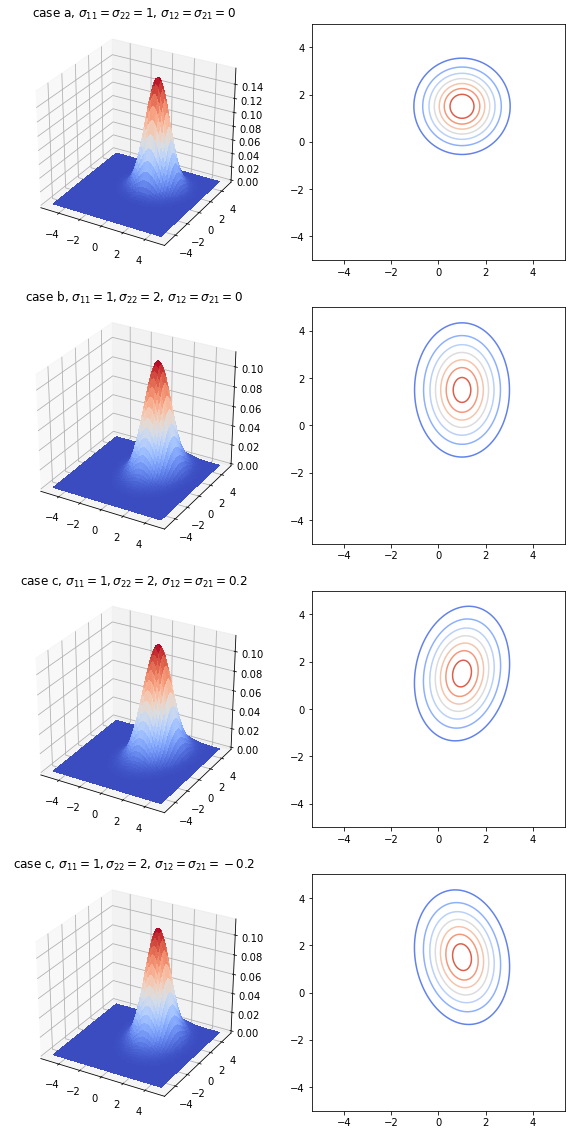

In [15]:
%matplotlib inline
fig = plt.figure(figsize = (10,20))
ax1 = fig.add_subplot(4, 2, 1,projection='3d')
ax1.title.set_text('case a, $\sigma_{11} = \sigma_{22} = 1$, $\sigma_{12} = \sigma_{21} = 0$')
ax1.plot_surface(xx, yy, zz_a, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax2 = fig.add_subplot(4, 2, 3, projection ='3d') 
ax2.title.set_text('case b, $\sigma_{11} = 1, \sigma_{22} = 2$, $\sigma_{12} = \sigma_{21} = 0$')
ax2.plot_surface(xx, yy, zz_b, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax3 = fig.add_subplot(4, 2, 5, projection ='3d') 
ax3.title.set_text('case c, $\sigma_{11} = 1, \sigma_{22} = 2$, $\sigma_{12} = \sigma_{21} = 0.2$')
ax3.plot_surface(xx, yy, zz_c, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax4 = fig.add_subplot(4, 2, 7, projection ='3d') 
ax4.title.set_text('case c, $\sigma_{11} = 1, \sigma_{22} = 2$, $\sigma_{12} = \sigma_{21} = -0.2$')
ax4.plot_surface(xx, yy, zz_d, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax5 = fig.add_subplot(4, 2, 2)
cs = ax5.contour(xx, yy, zz_a,cmap=cm.coolwarm)
ax5.set_xlim([-5,5])
ax5.set_ylim([-5,5])
ax5.axis('equal')

ax6 = fig.add_subplot(4, 2, 4)
cs = ax6.contour(xx, yy, zz_b,cmap=cm.coolwarm)
ax6.set_xlim([-5,5])
ax6.set_ylim([-5,5])
ax6.axis('equal')


ax7 = fig.add_subplot(4, 2, 6)
cs = ax7.contour(xx, yy, zz_c,cmap=cm.coolwarm)
ax7.set_xlim([-5,5])
ax7.set_ylim([-5,5])
ax7.axis('equal')

ax8 = fig.add_subplot(4, 2, 8)
cs = ax8.contour(xx, yy, zz_d,cmap=cm.coolwarm)
ax8.set_xlim([-5,5])
ax8.set_ylim([-5,5])
ax8.axis('equal')


physical meaning 
1. off-diagonal shows the correlation between features. if the off-diagonal elements is positive, it means that features have positive relationships, in other words, they are positively correlated. likewise, if the off-diagonal is negative, it means features are negatively correlated. (case c and d) 
2. the diagonal value reveals the relative scale of each dimention (feature) when the off-diagonal is 0. (case a and b)
3. if off-diagonal elements is zero, x and y are not correlated, the contour is made up of circles (case  and b)
4. when we take different values, the covariance matrix behaves as a tool to rotate and stretch the shape of contour. For instance, from case a to case b, the only difference is the diagonal value, it works in a form of stretch the y-axis ( x aixs is same, so it remains the same scale). From case a to c and d, when off-diagonal is no longer 0, then the contour looks like it is rotated. 

### Question 3 
Perform agglomerative clustering on the following data sets using dmin and dmax.
Need to show details on each iteration. Comment on the different (or similar) shapes of
clusters resulted by using these two distance metrics. Use L1 norm (or city block
distance) when calculating dmin and dmax.

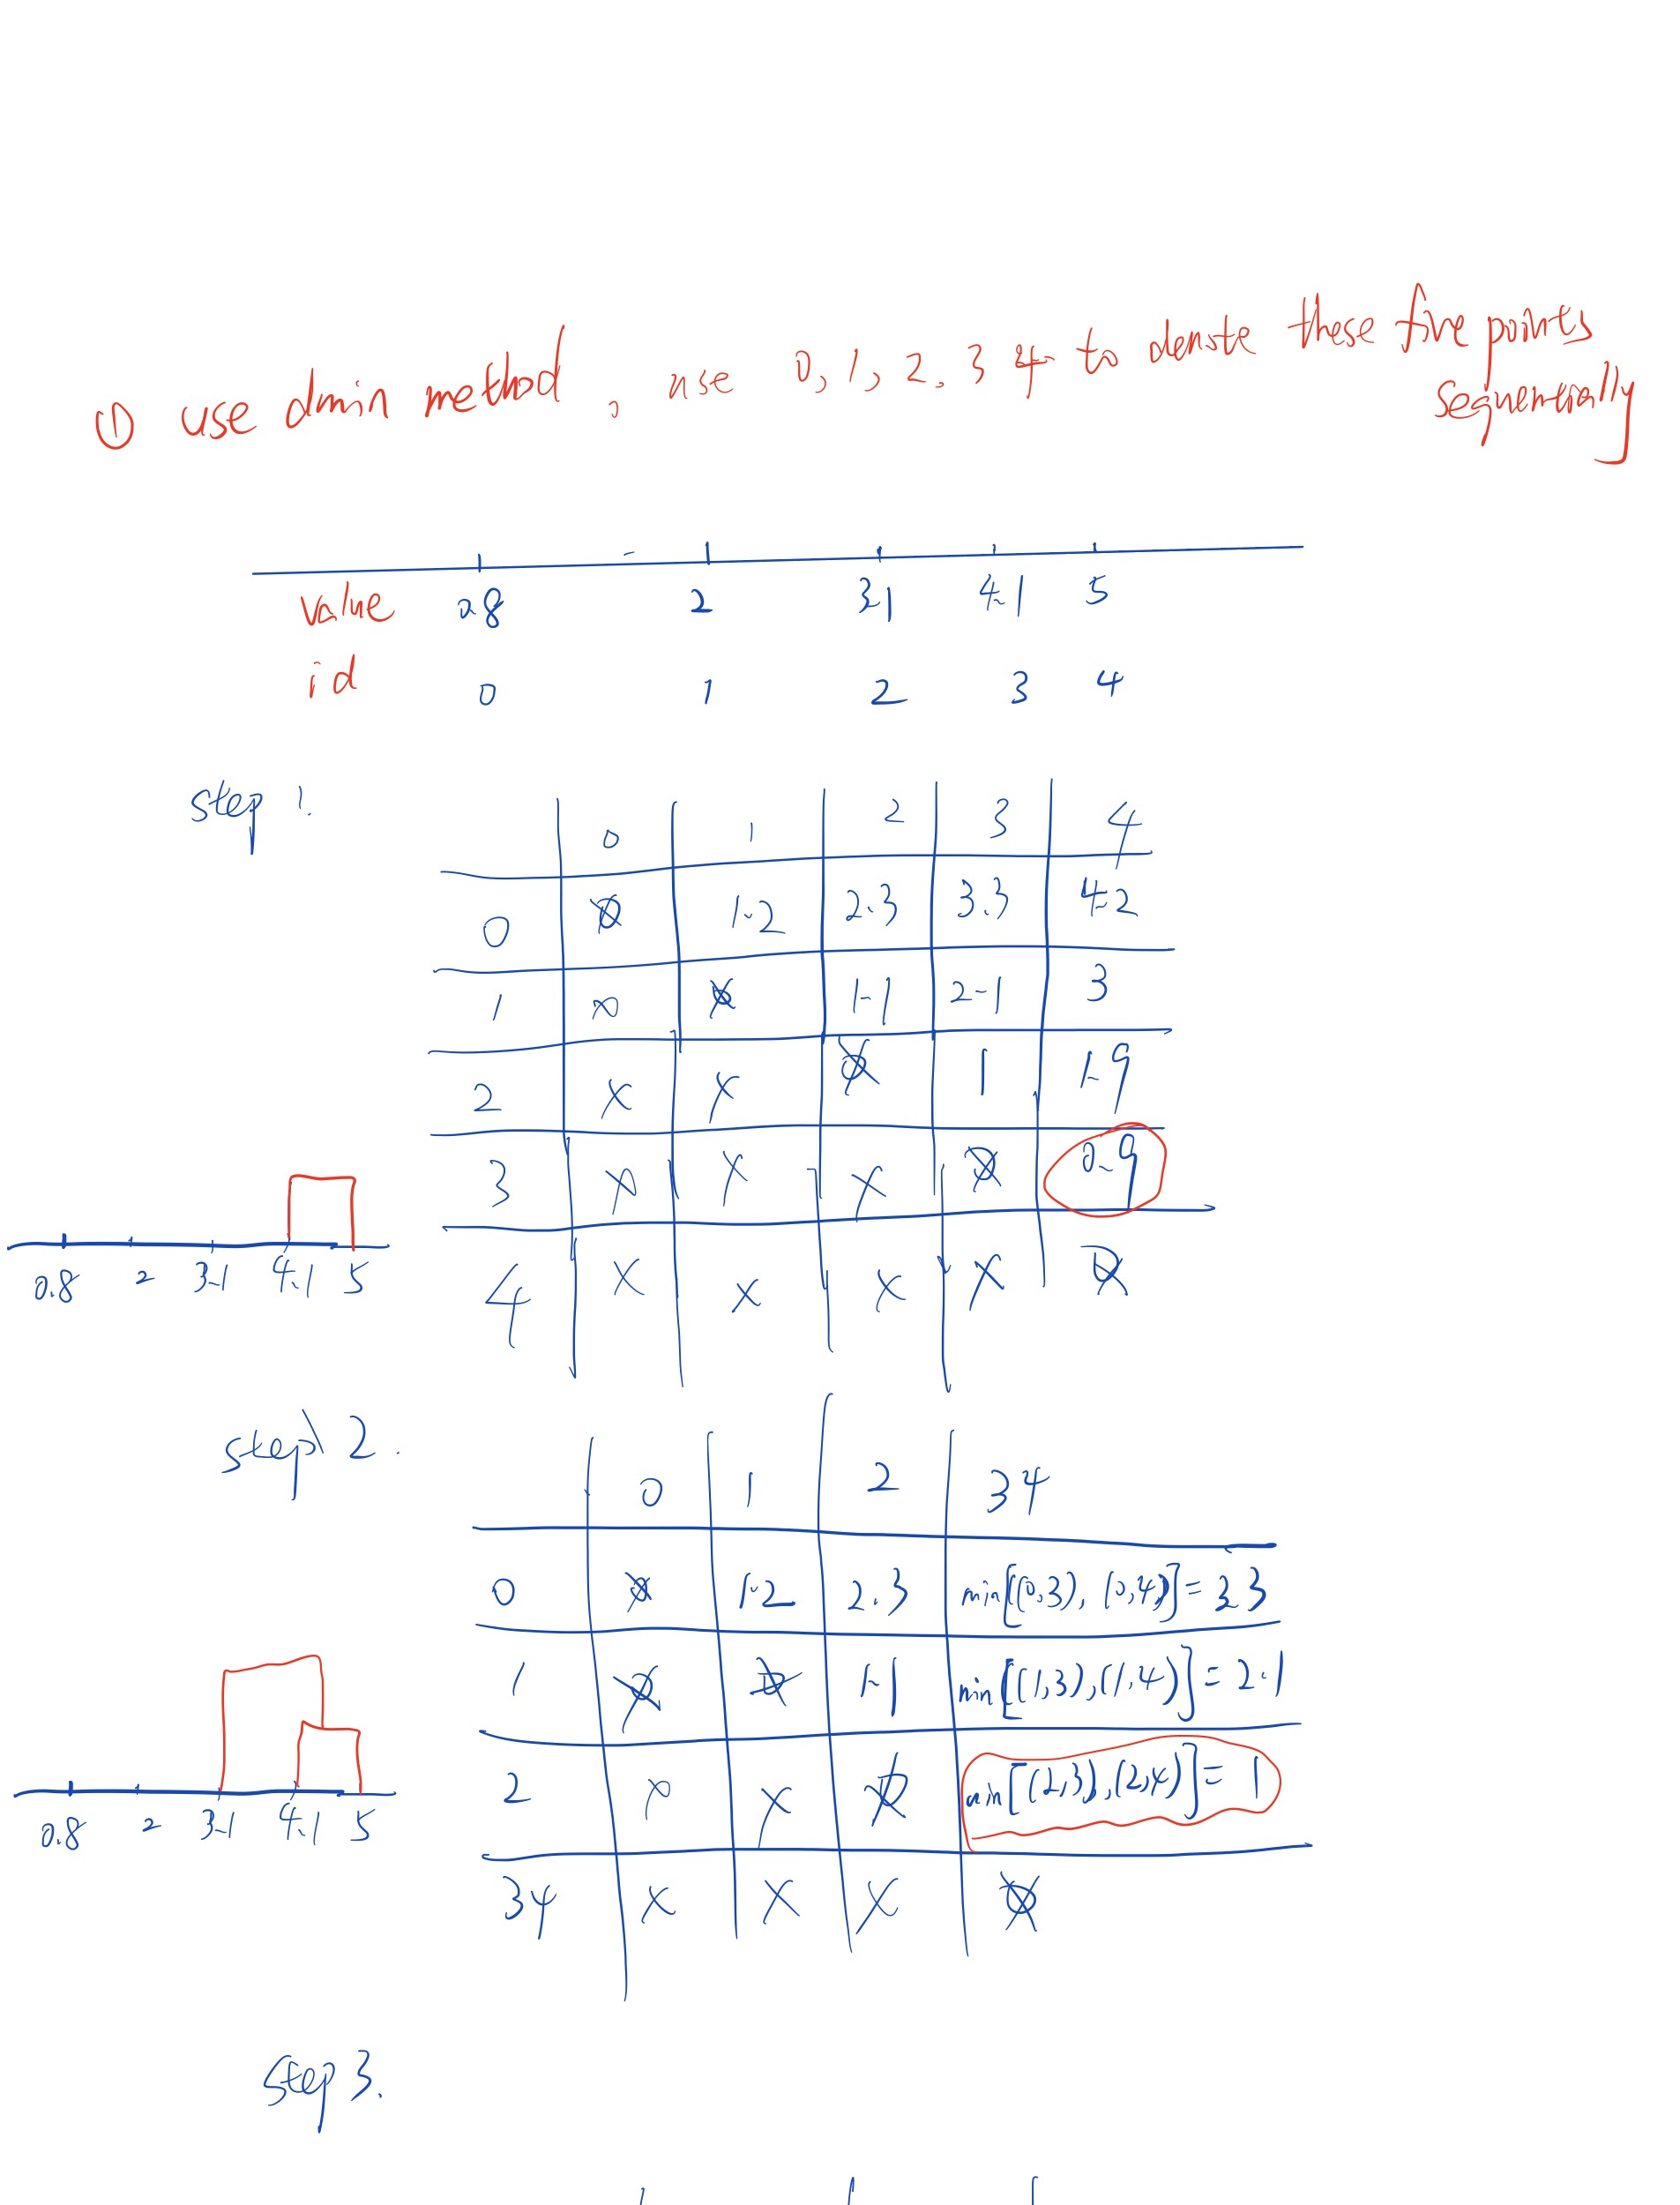

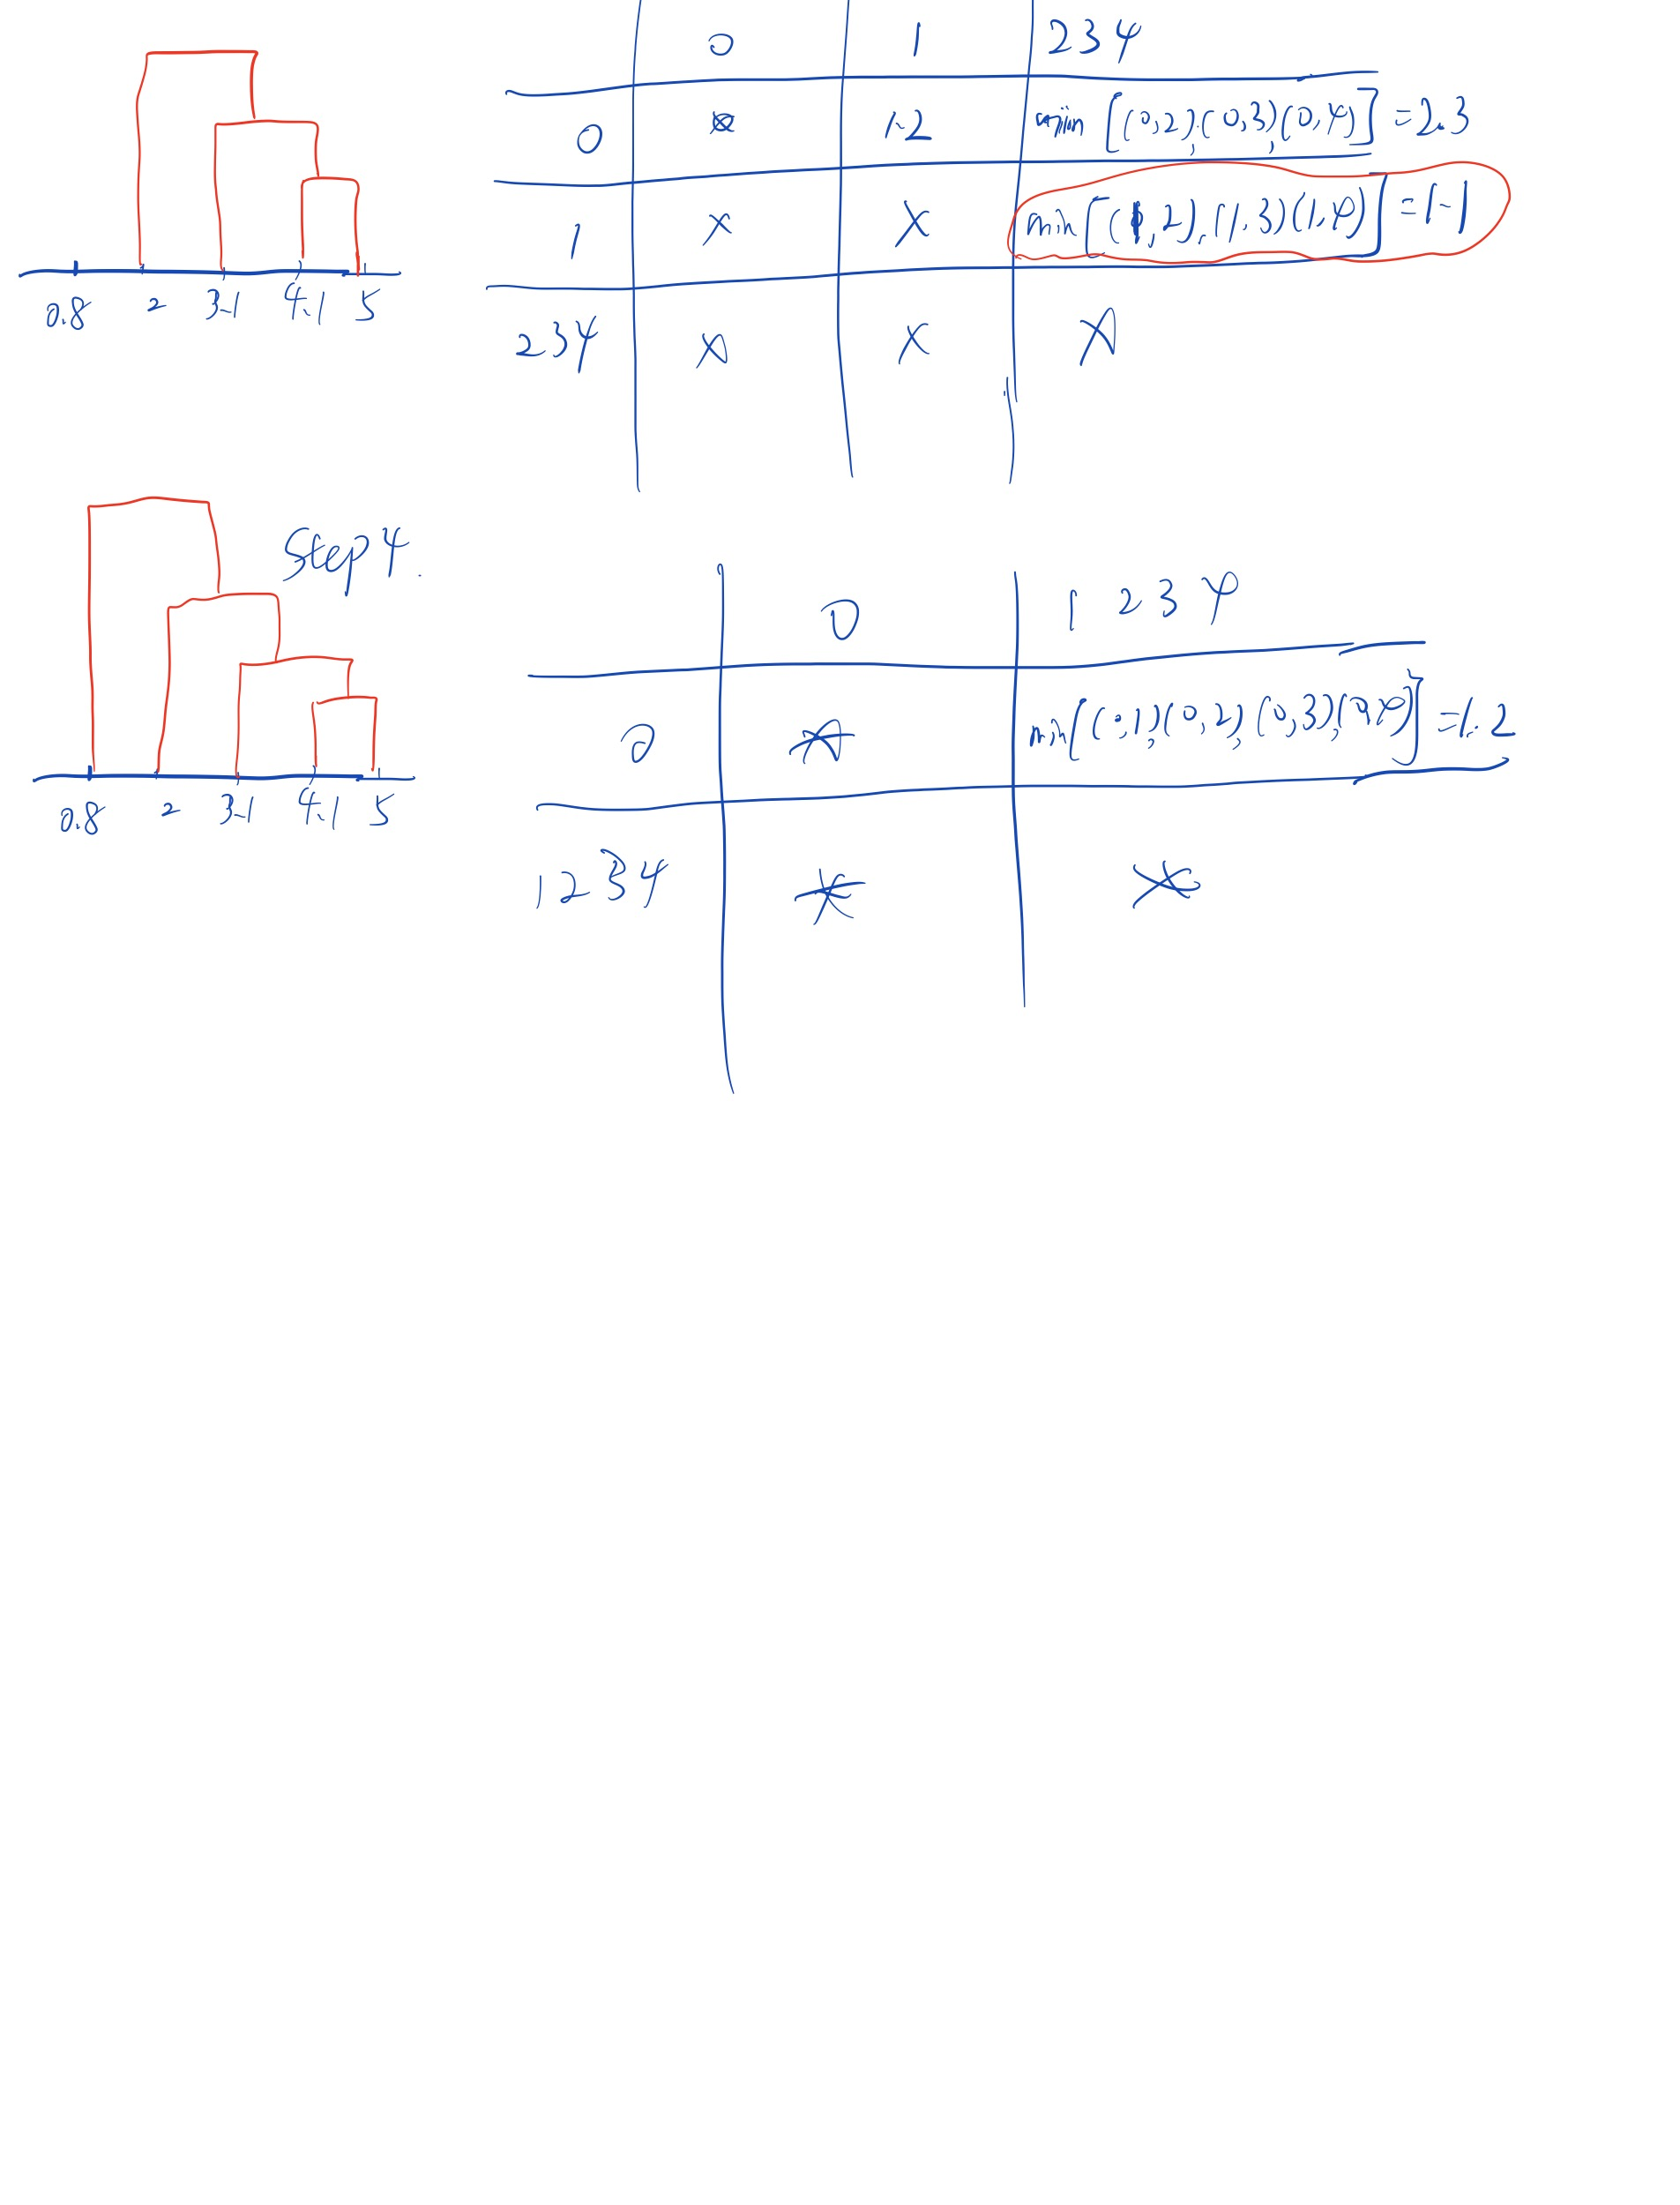

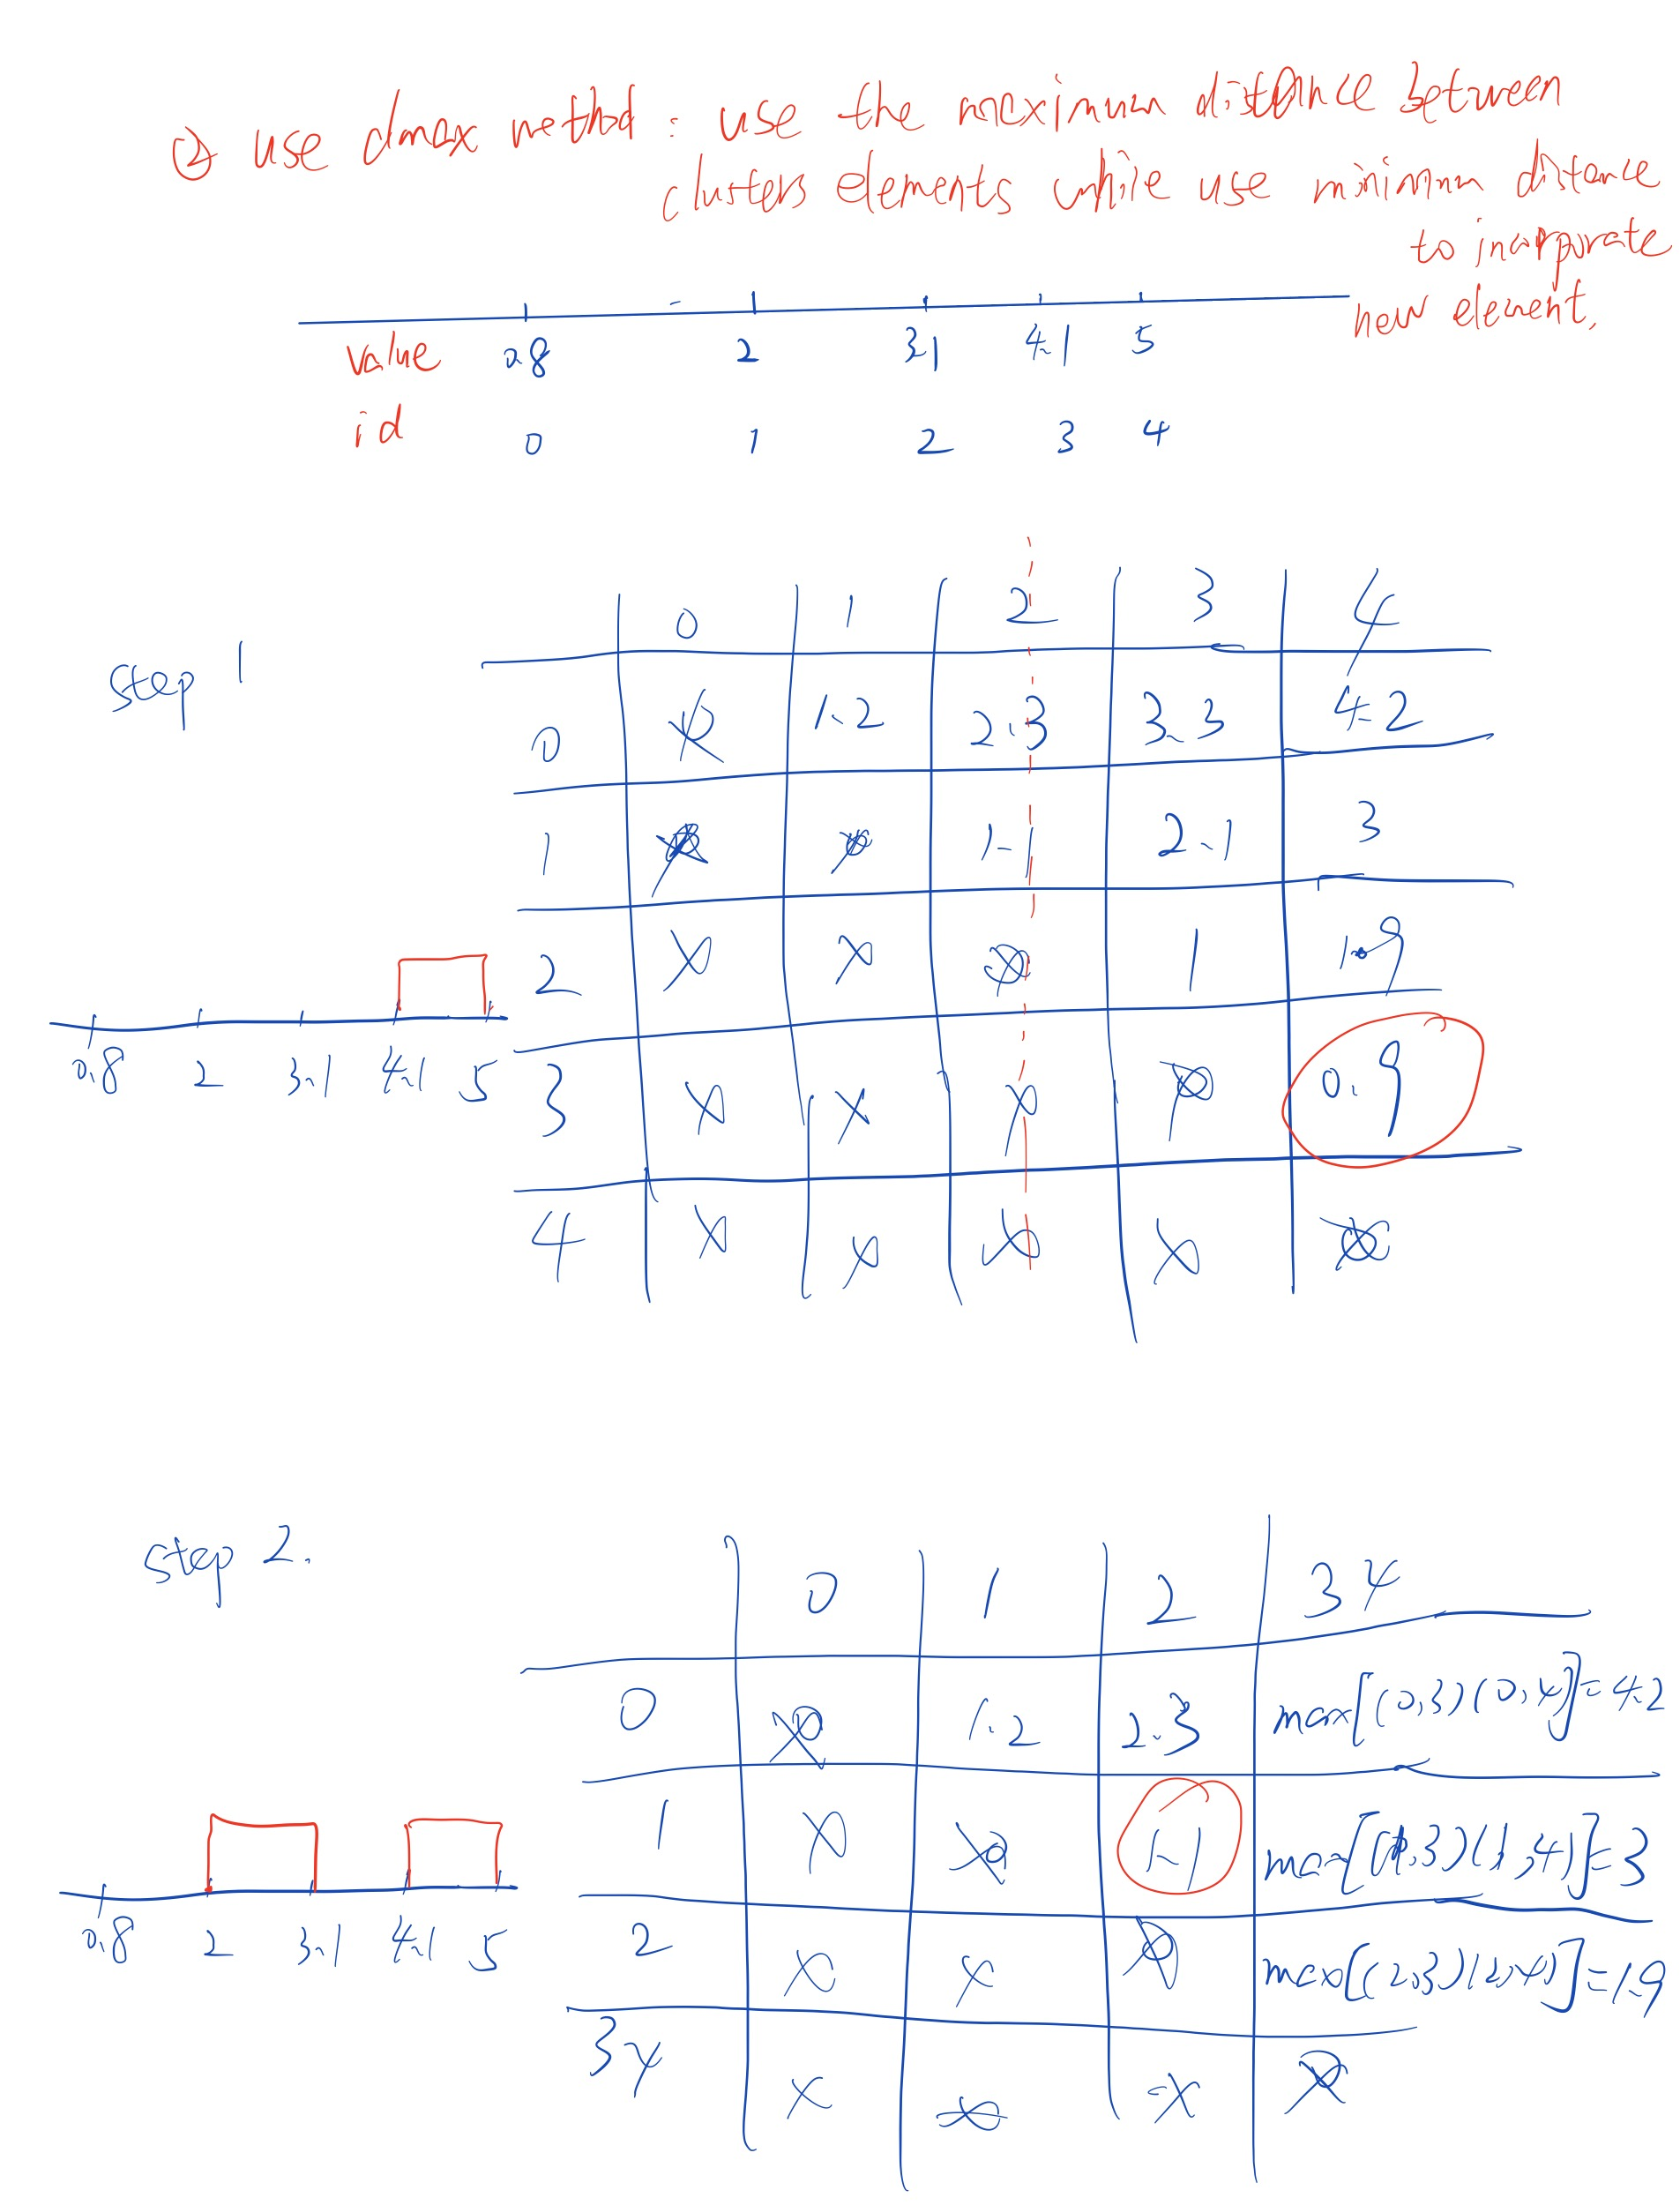

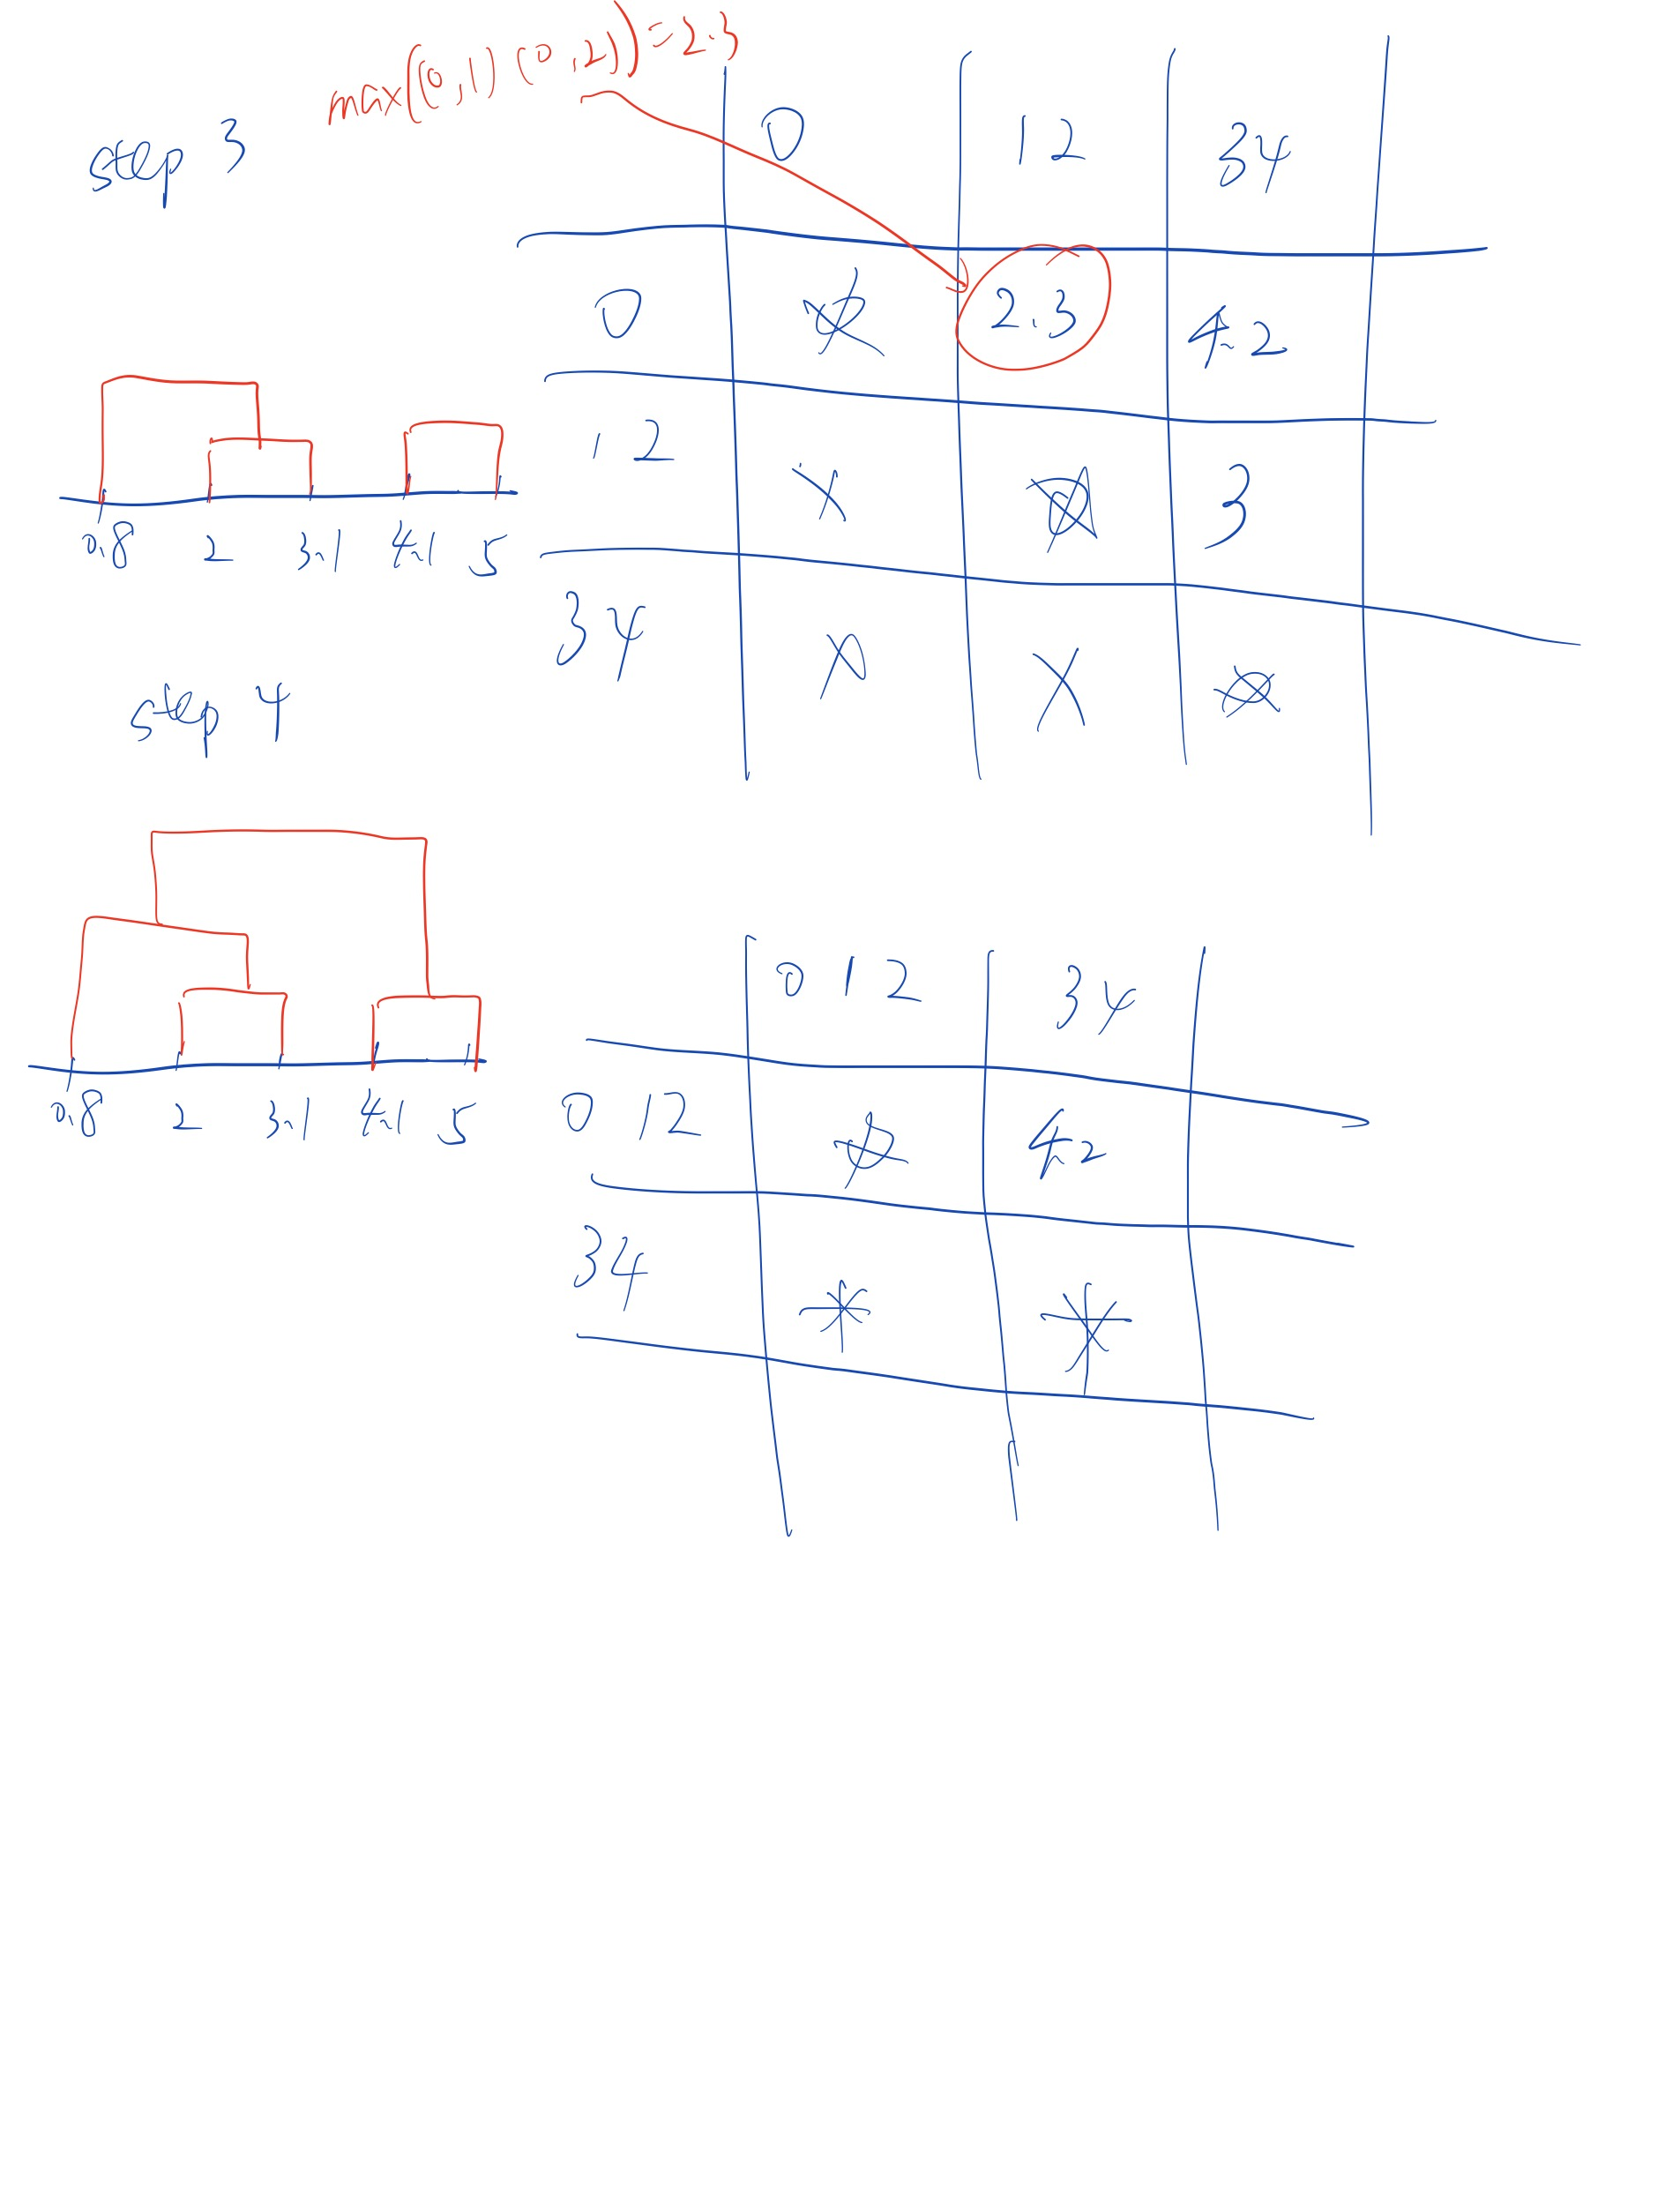

Comments
* when we use dmin to measure the distance between clusters, the cluster tends to merge in one direction, as clusters in dmin case merges from the right to left sequentially.
* while when we use dmax to measure the distance between clusters, the cluster could grow in different directions, as two clusters grows at the same time in dmax case. 

## Question 4. 
Using maximum likelihood method to derive the equation for mean and variance
assuming the pdf (or likelihood) is modeled by 1-D Gaussian.

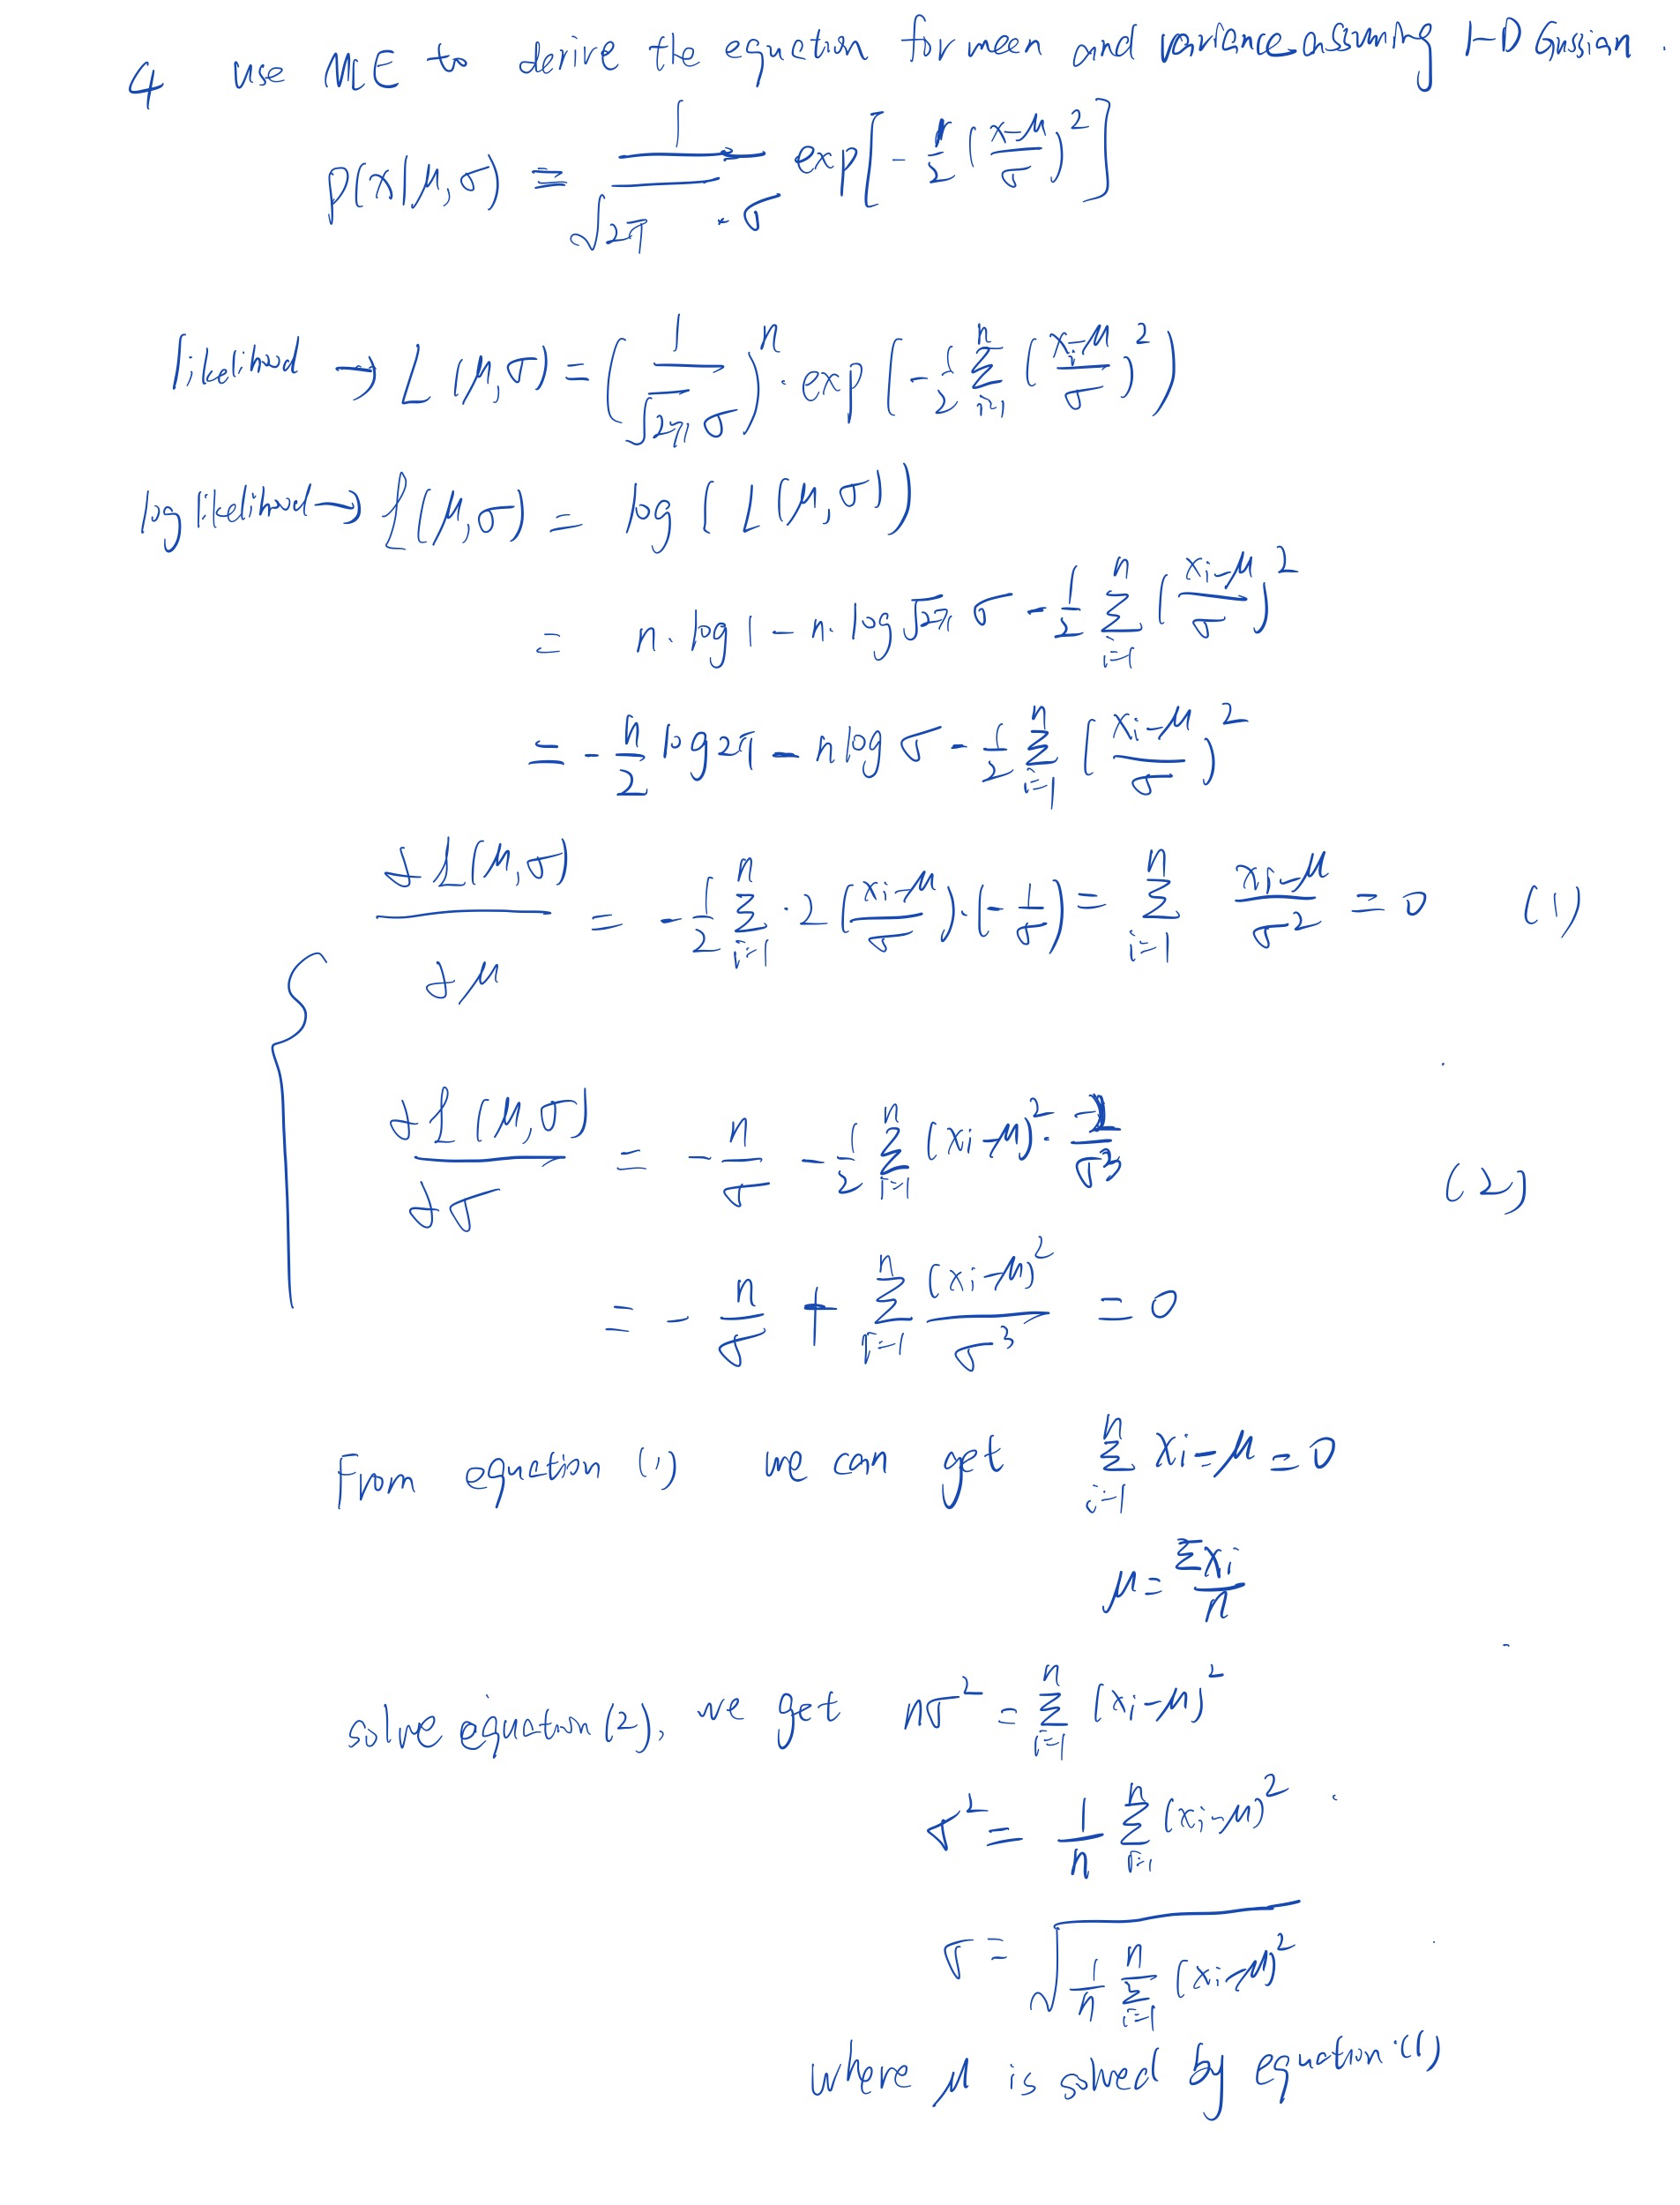